In [1]:
import pandas as pd 
import plotly.express as px 
import plotly.graph_objs as go


In [2]:
df = pd.read_csv('Data_Set.csv', sep=';')


In [3]:
df['Data_publicada'] = pd.to_datetime(df['Data_publicada'], format='%d/%m/%Y')

In [4]:
df.Categorias.unique()

array(['Reflexivo', 'Educacional', 'Engajamento',
       'Práticas Sex. / Relacionamento', 'Comunidade',
       'Divulgação de ação', 'Institucional'], dtype=object)

# Alcance médio por tipo de categoria 

In [5]:
df_aux = df[['Alcance', 'Categorias']].groupby('Categorias').agg({'Alcance':'mean'}).round().sort_values('Alcance', ascending=False)

df_aux.columns = ['Alcance médio']

df_aux = df_aux.reset_index()

df_aux

Categorias  Alcance médio
0  Práticas Sex. / Relacionamento        37182.0
1                     Engajamento        21138.0
2                     Educacional        18521.0
3                   Institucional        17782.0
4                       Reflexivo        16847.0
5                      Comunidade        15116.0
6              Divulgação de ação         6825.0

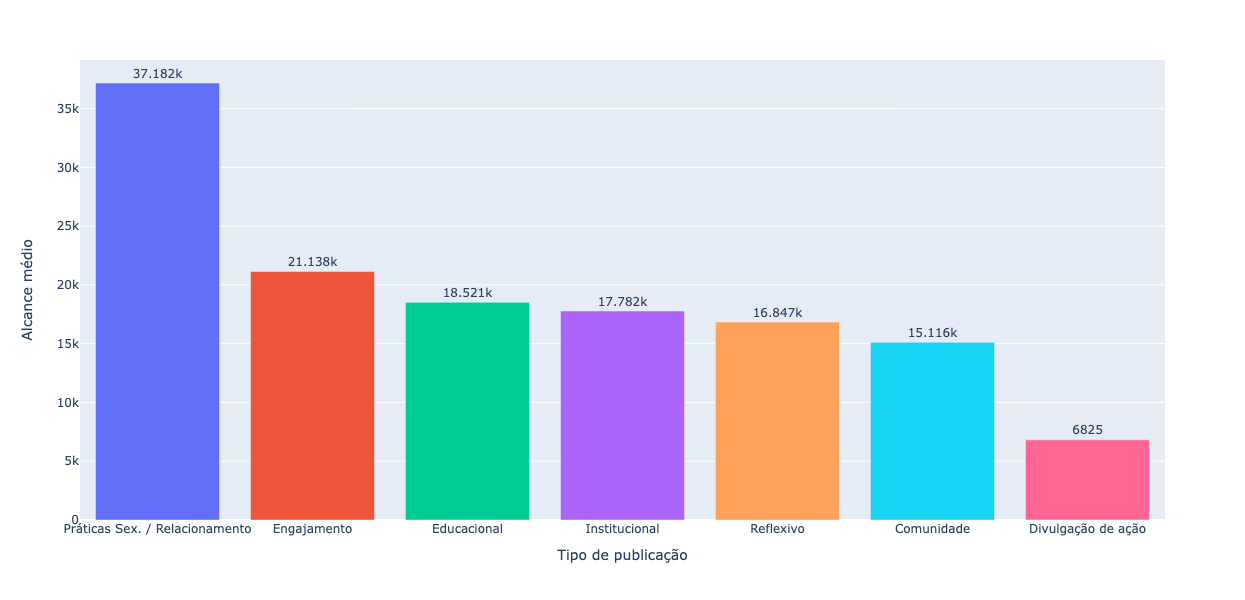

In [6]:
fig = px.bar( df_aux,  x='Categorias', y='Alcance médio', color= 'Categorias')

fig.update_layout(
    width=1200,
    height=600,
    yaxis_title='Alcance médio',
    xaxis_title='Tipo de publicação',
    showlegend=False,
  
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

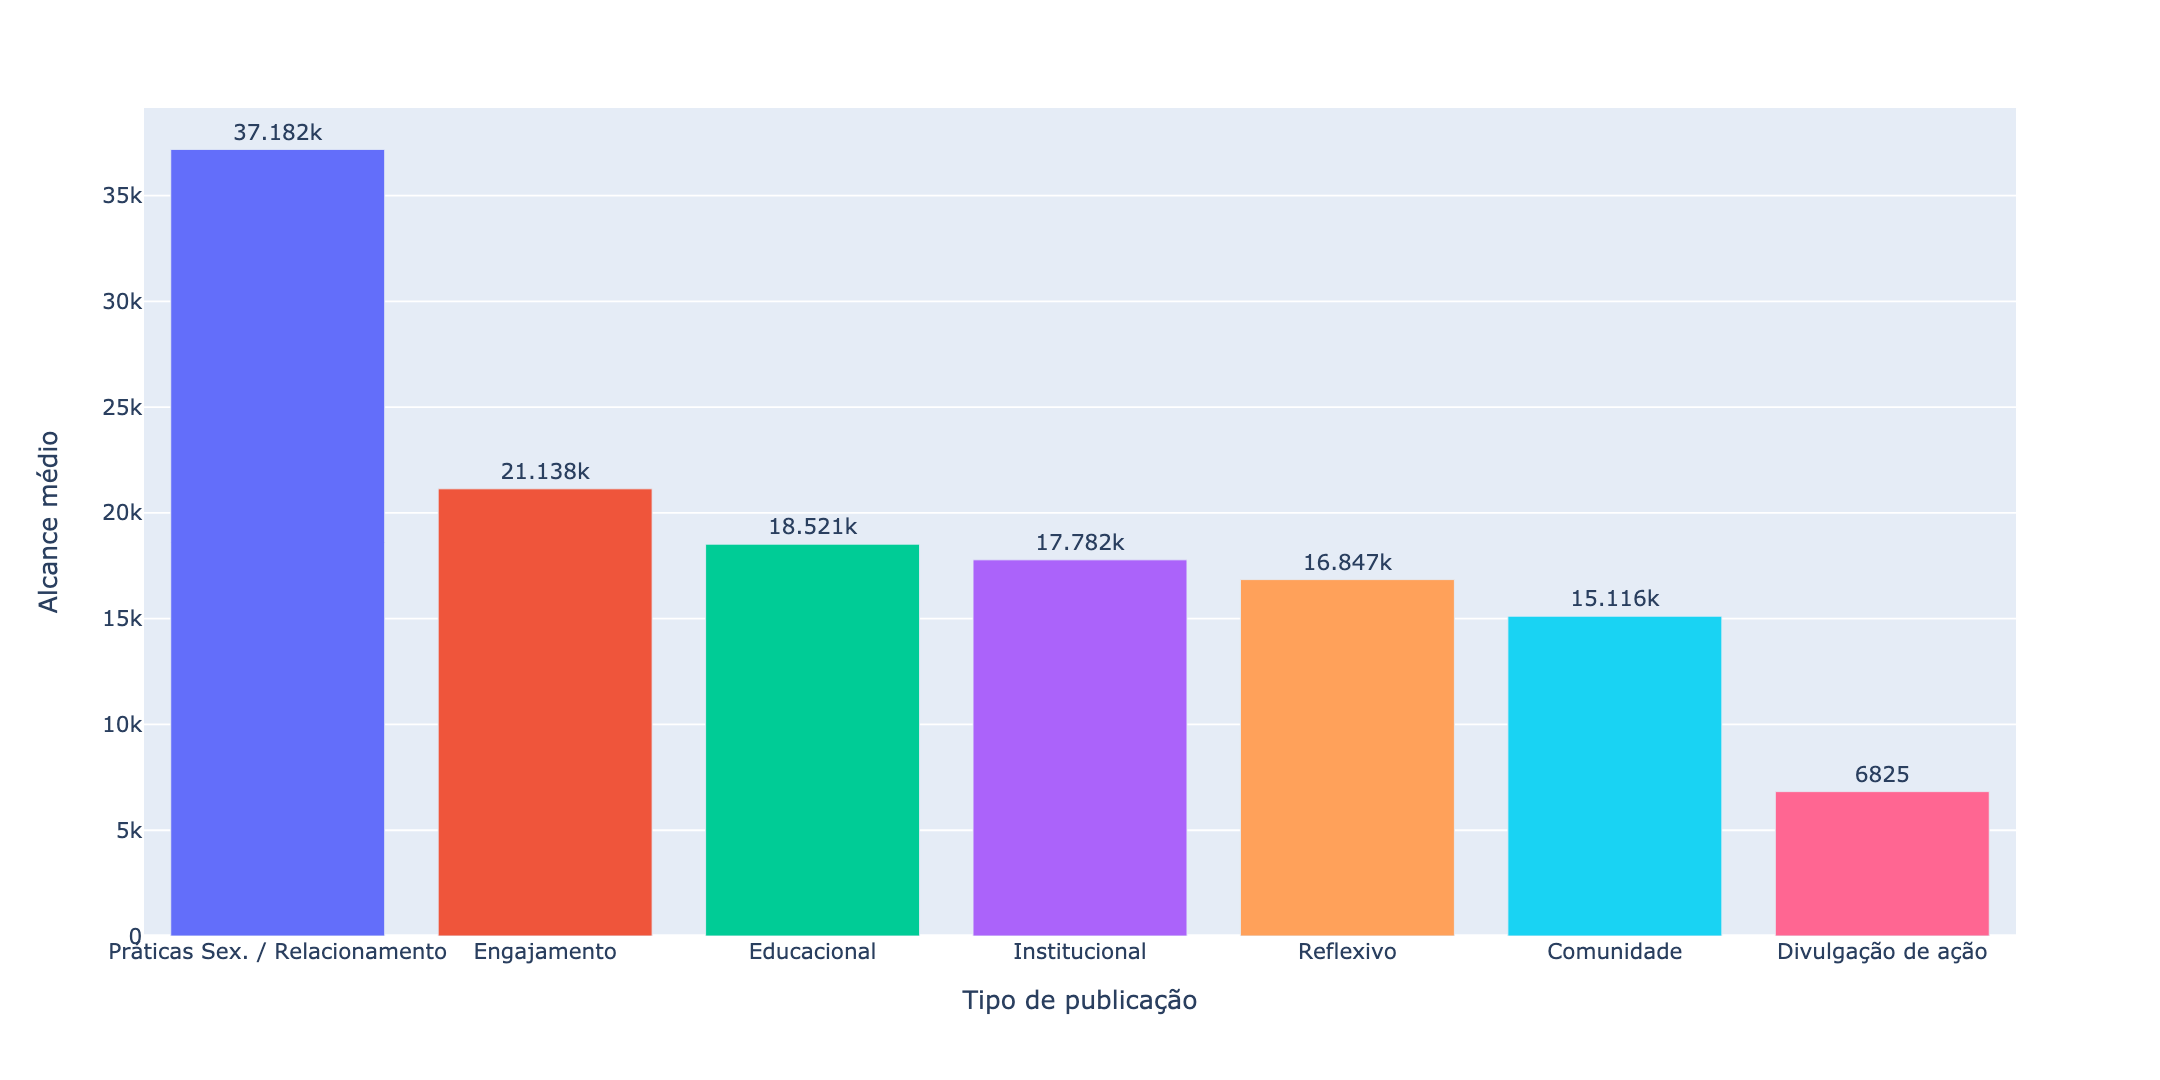

In [7]:
fig.show('png', scale=1.8)

# Dispersão por categoria nas 3 métricas principais + Boxplot Alcance

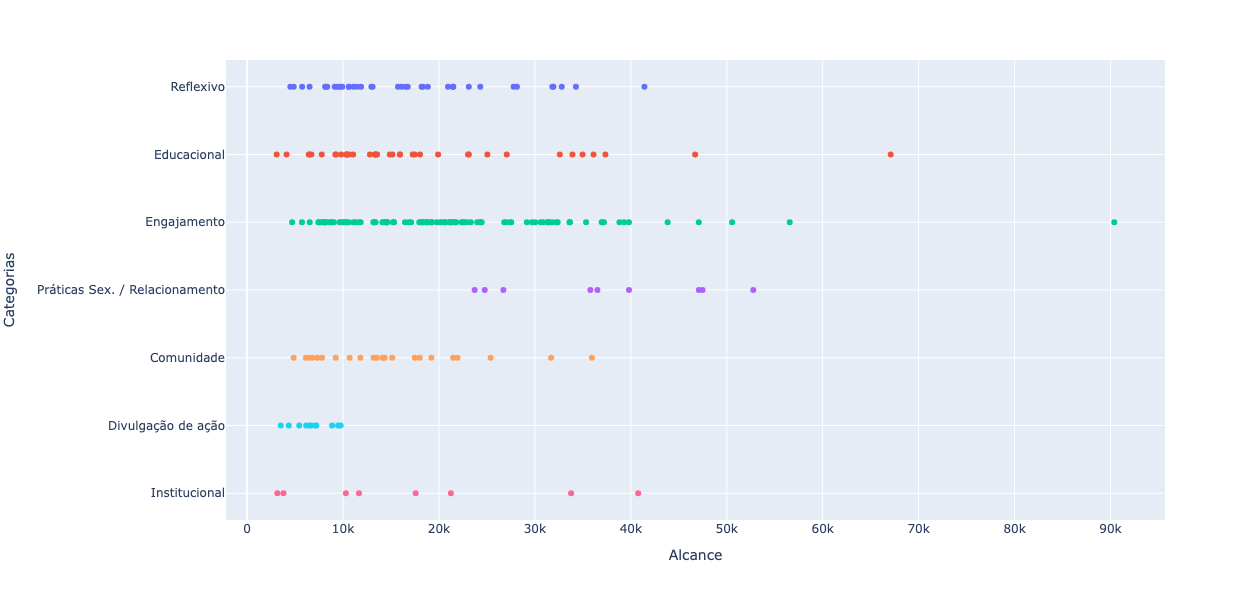

In [8]:
fig = px.scatter( df, x='Alcance', y='Categorias', color='Categorias')

fig.update_layout(
    width=1200,
    height=600,
    showlegend=False
)

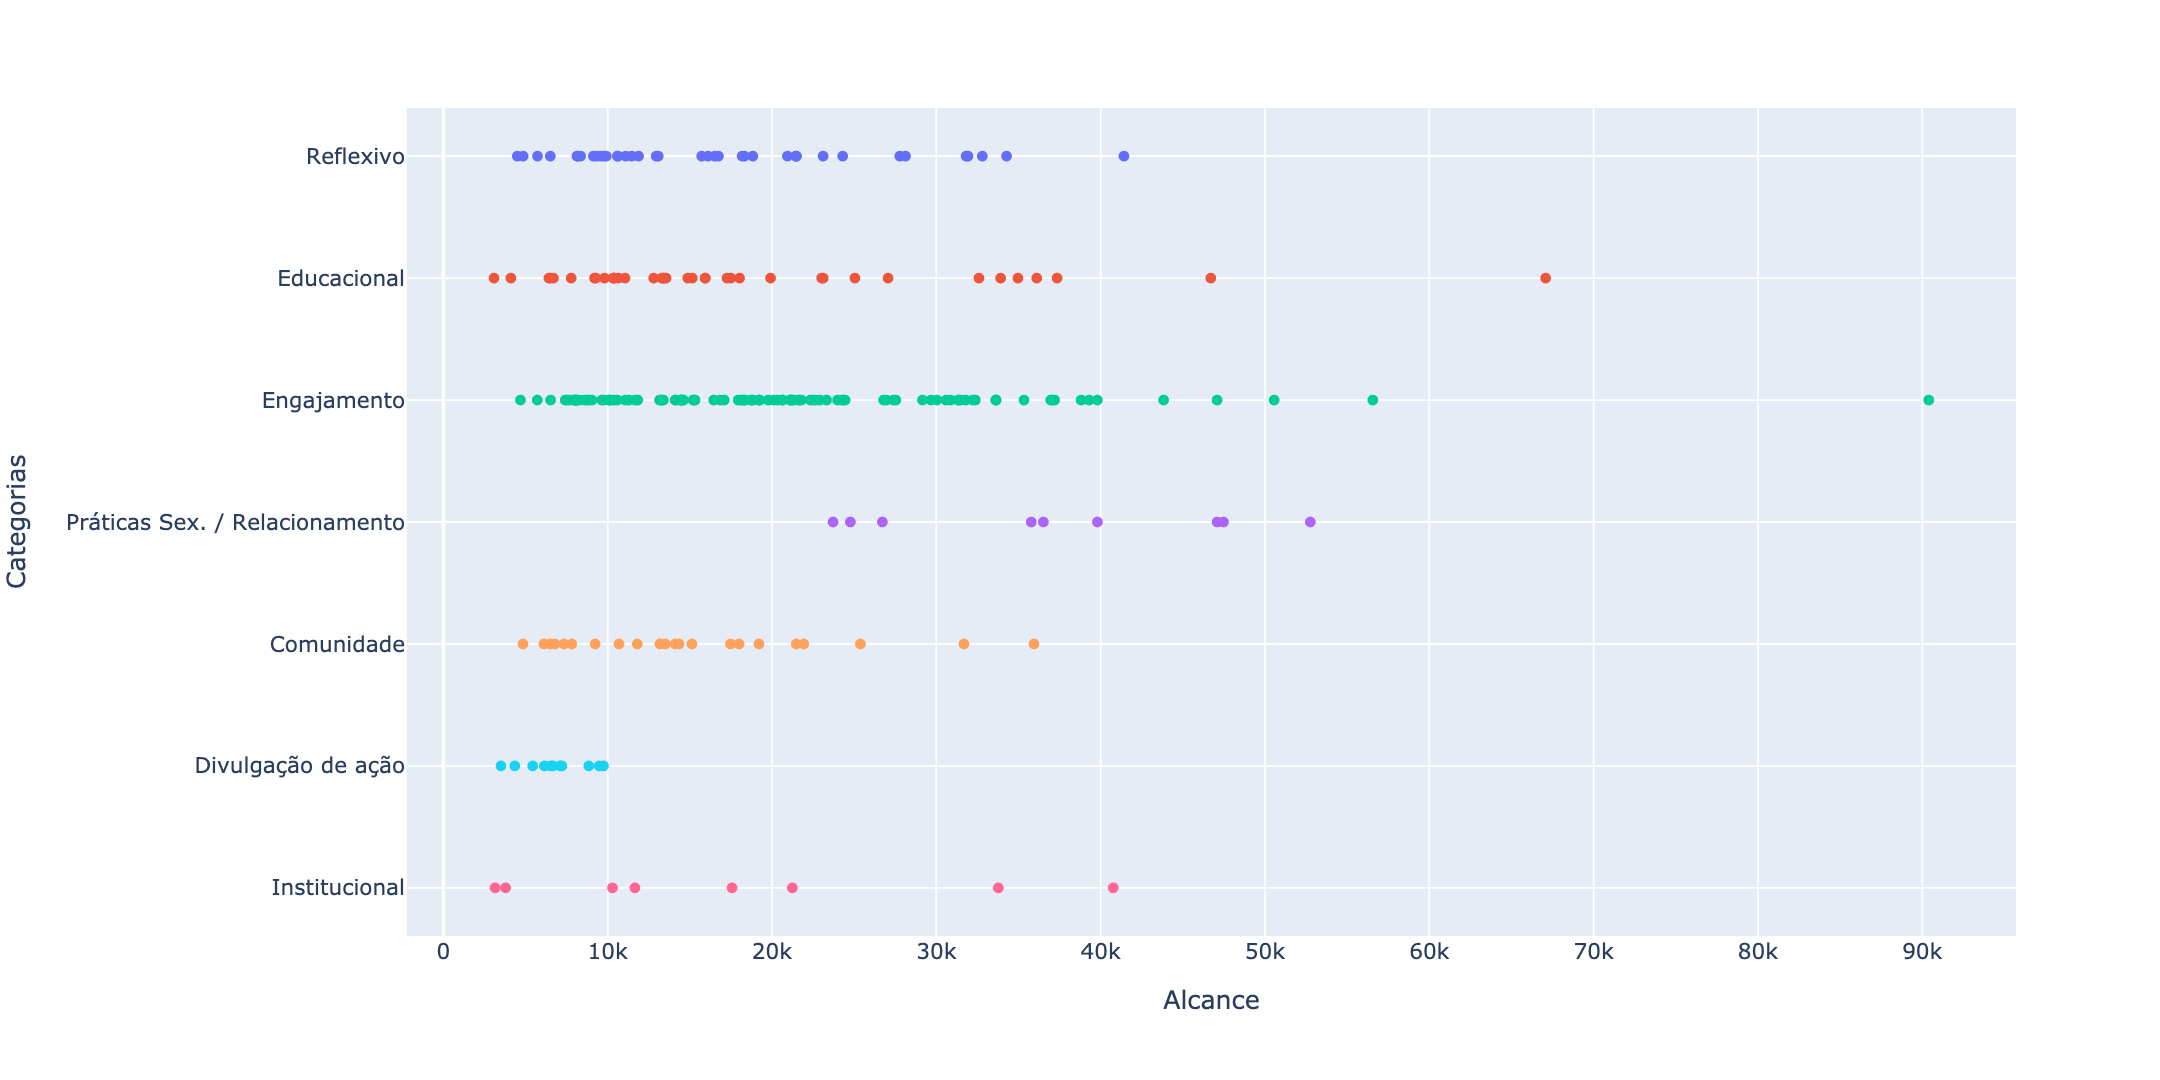

In [9]:
fig.show('png', scale=1.8)

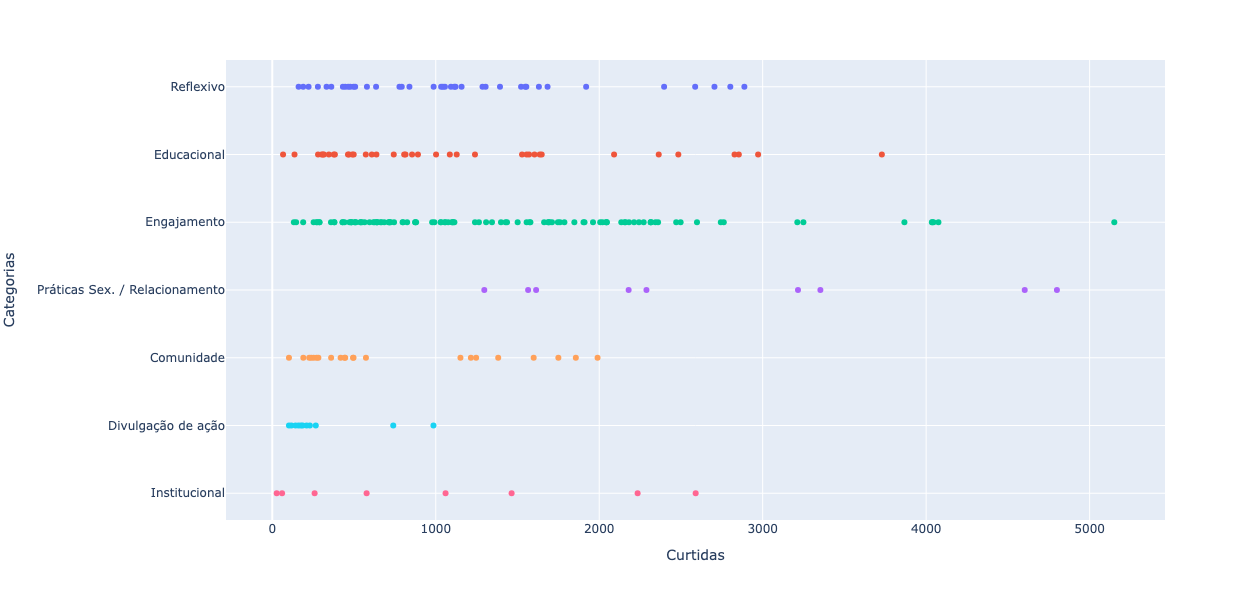

In [10]:
fig = px.scatter( df, x='Curtidas', y='Categorias', color='Categorias')

fig.update_layout(
    width=1200,
    height=600,
    showlegend=False
)

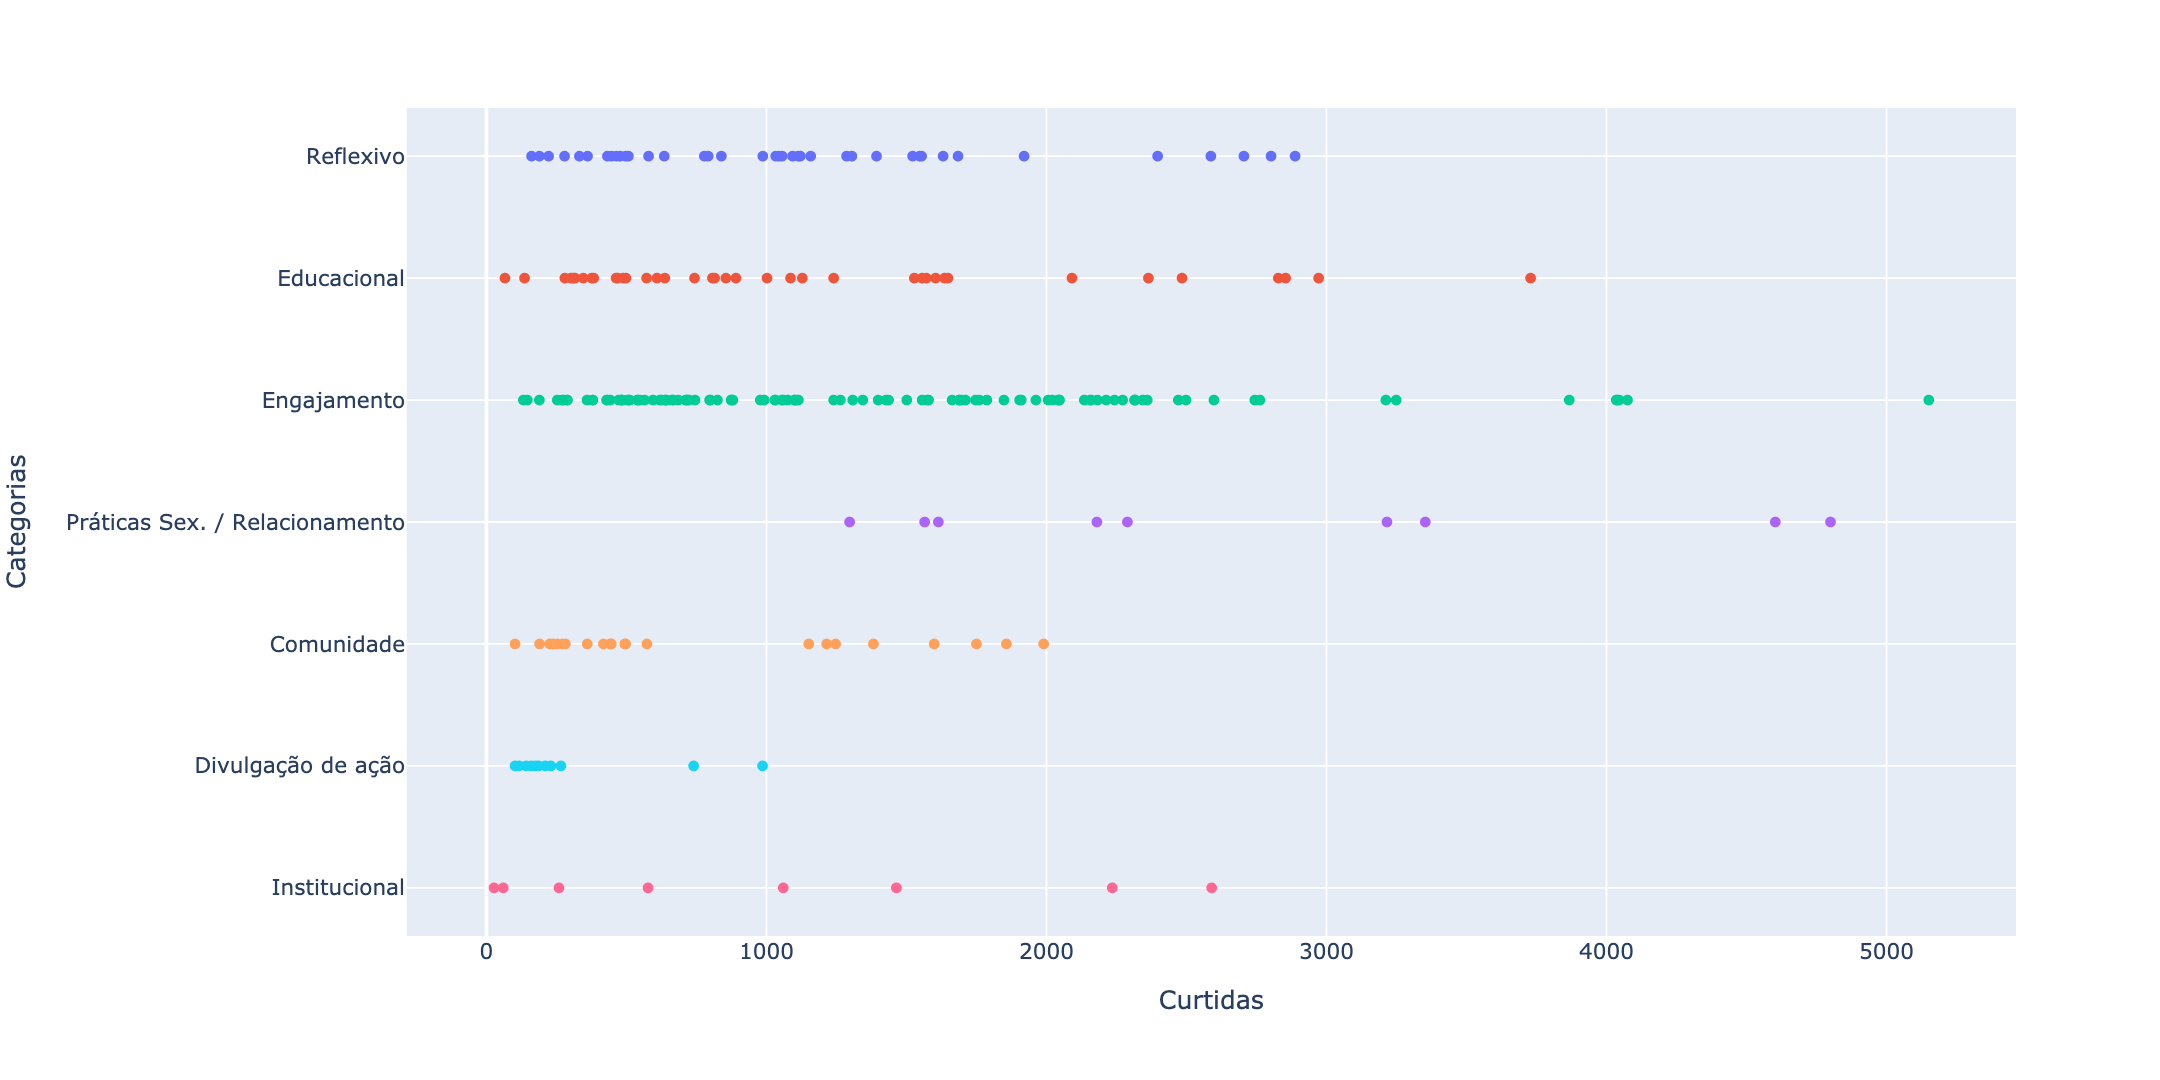

In [11]:
fig.show('png', scale=1.8)

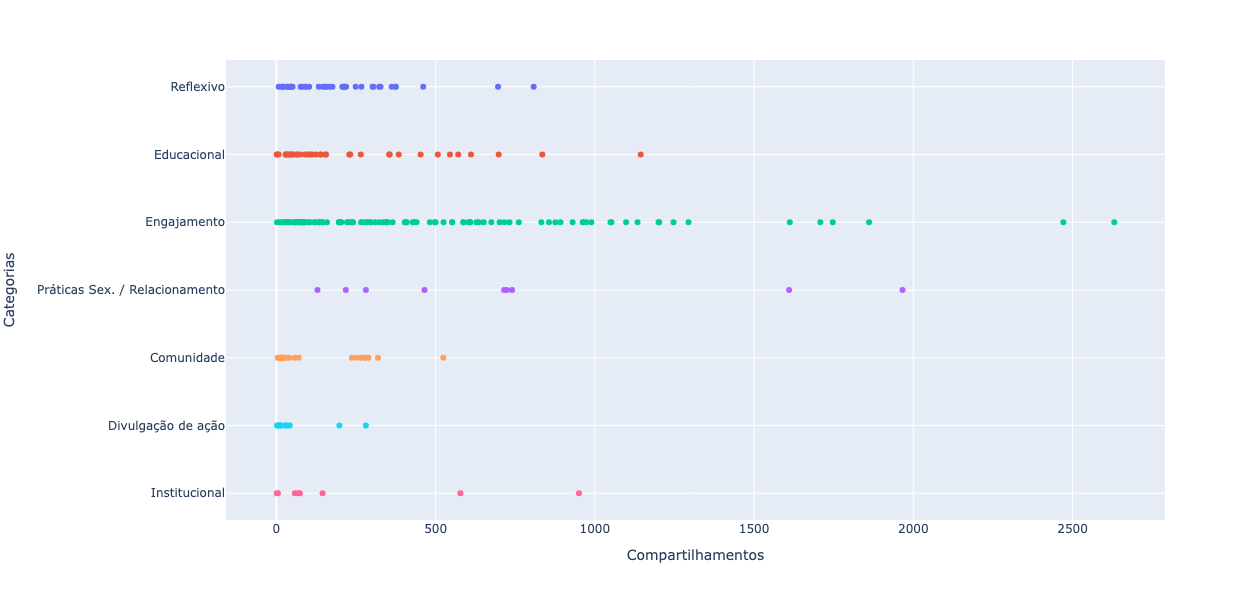

In [12]:
fig = px.scatter( df, x='Compartilhamentos', y='Categorias', color='Categorias')

fig.update_layout(
    width=1200,
    height=600,
    showlegend=False
)

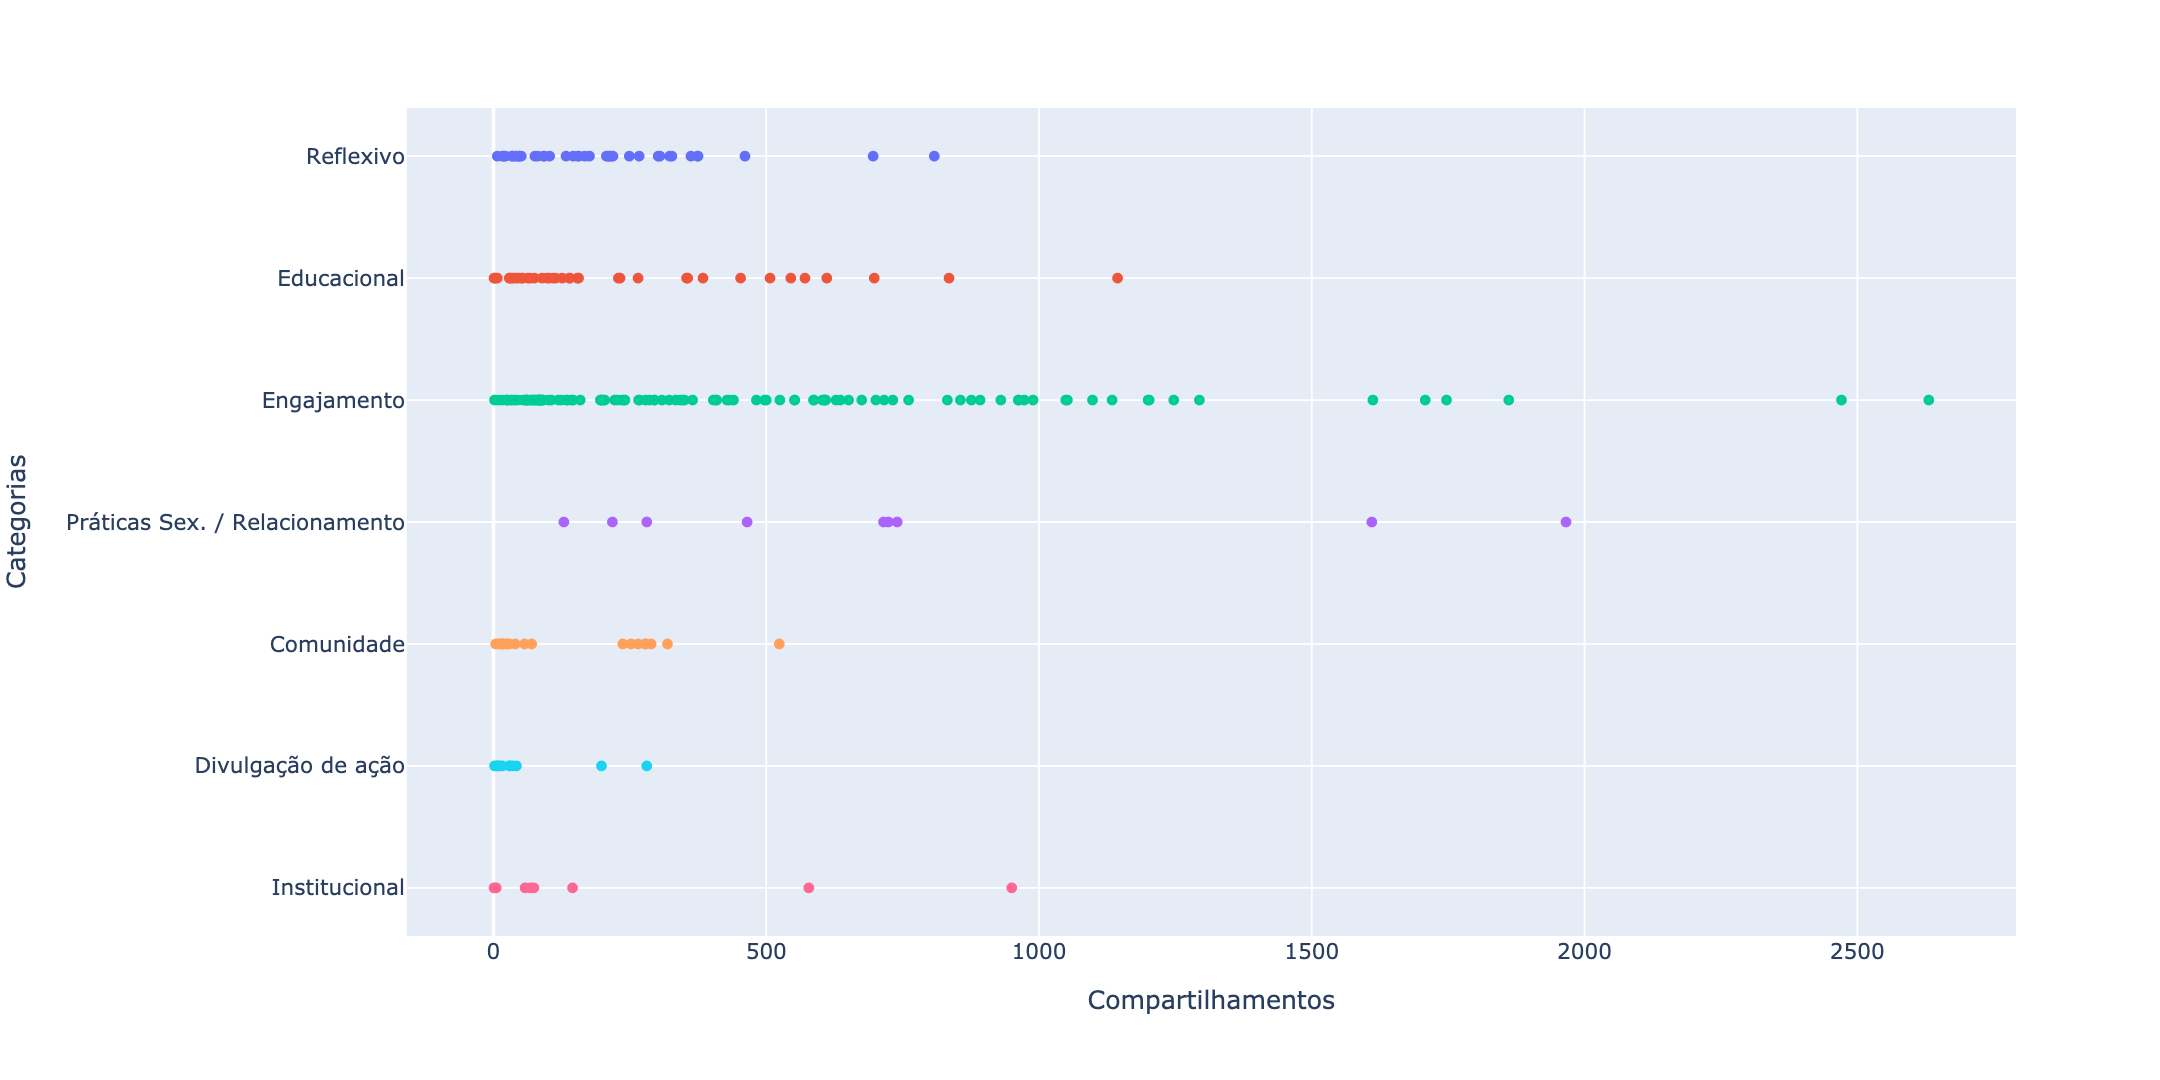

In [13]:
fig.show('png', scale=1.8)

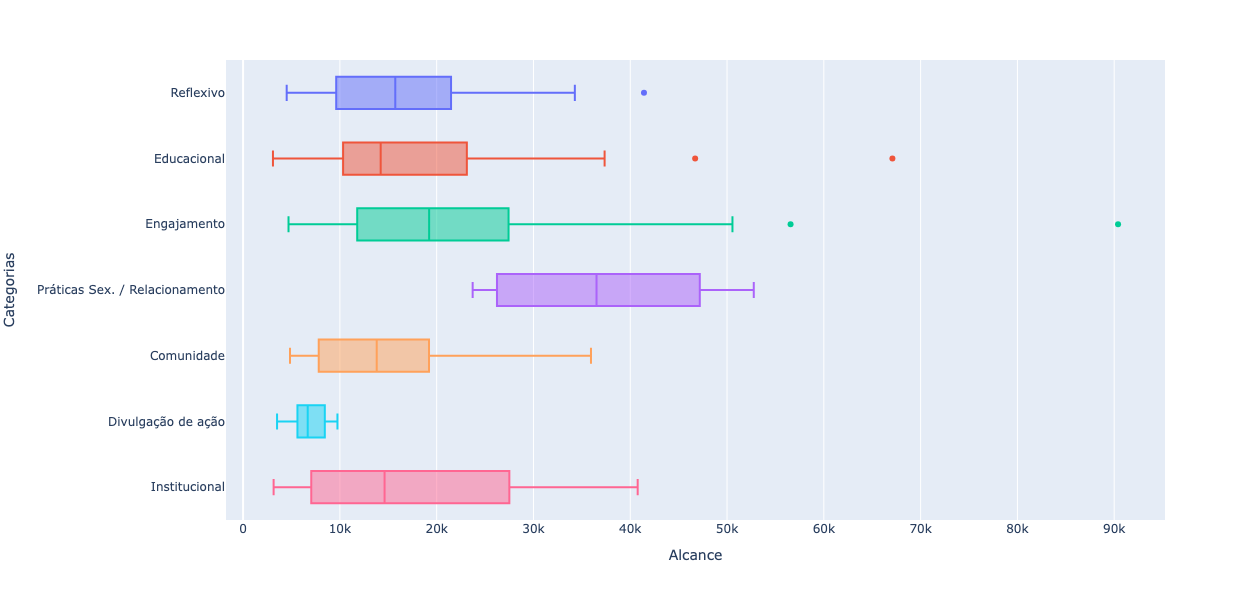

In [14]:
fig =px.box(df, x='Alcance', y='Categorias', color='Categorias')

fig.update_layout(
    width=1200,
    height=600,
    showlegend=False
)

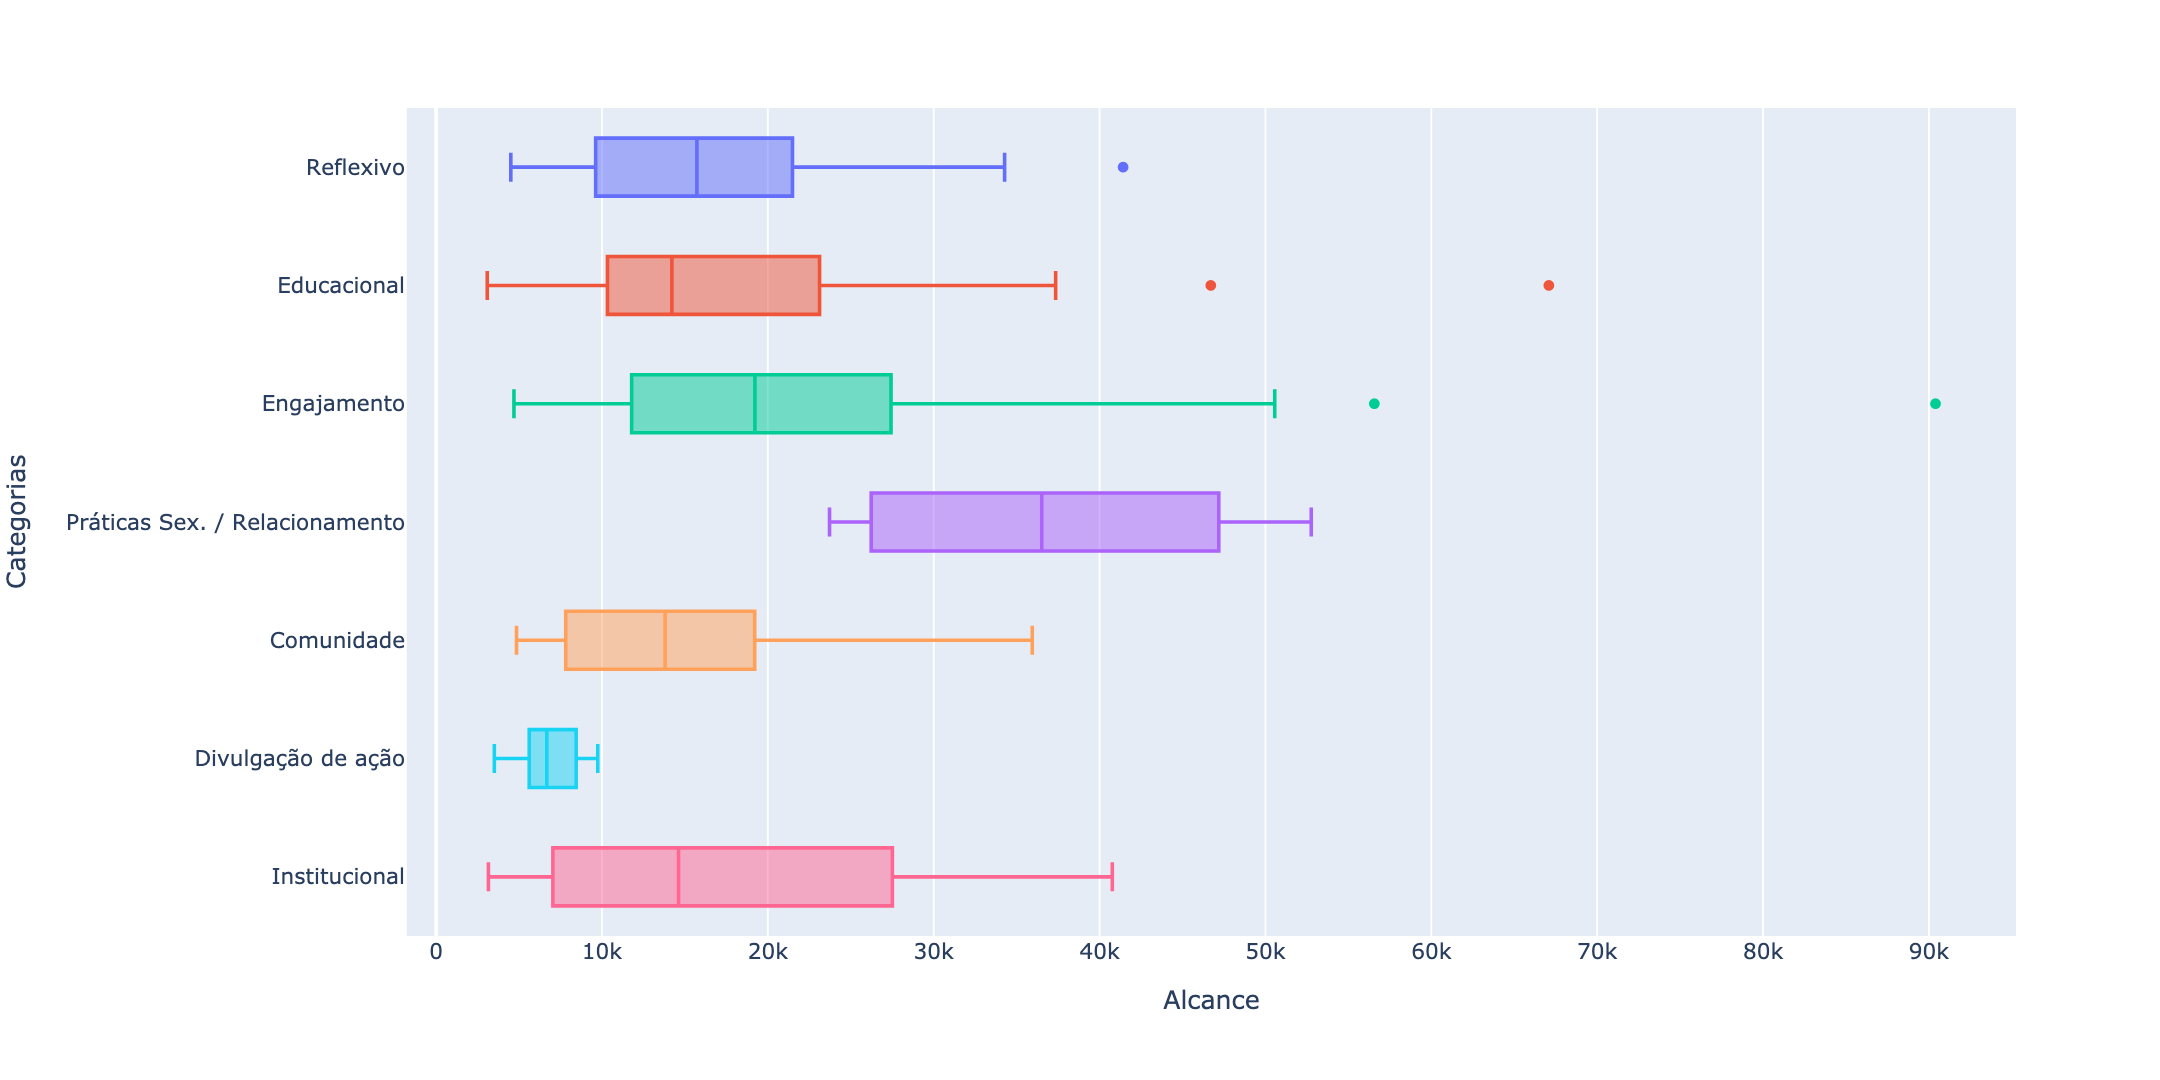

In [15]:
fig.show('png', scale=1.8)

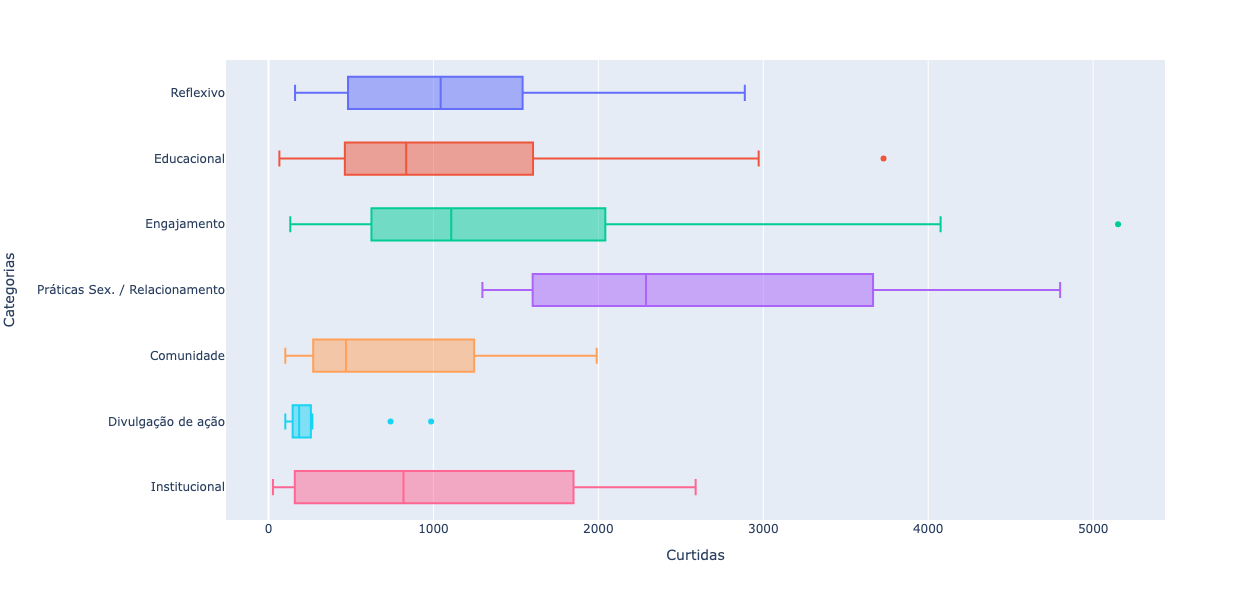

In [16]:
fig =px.box(df, x='Curtidas', y='Categorias', color='Categorias')

fig.update_layout(
    width=1200,
    height=600,
    showlegend=False
)

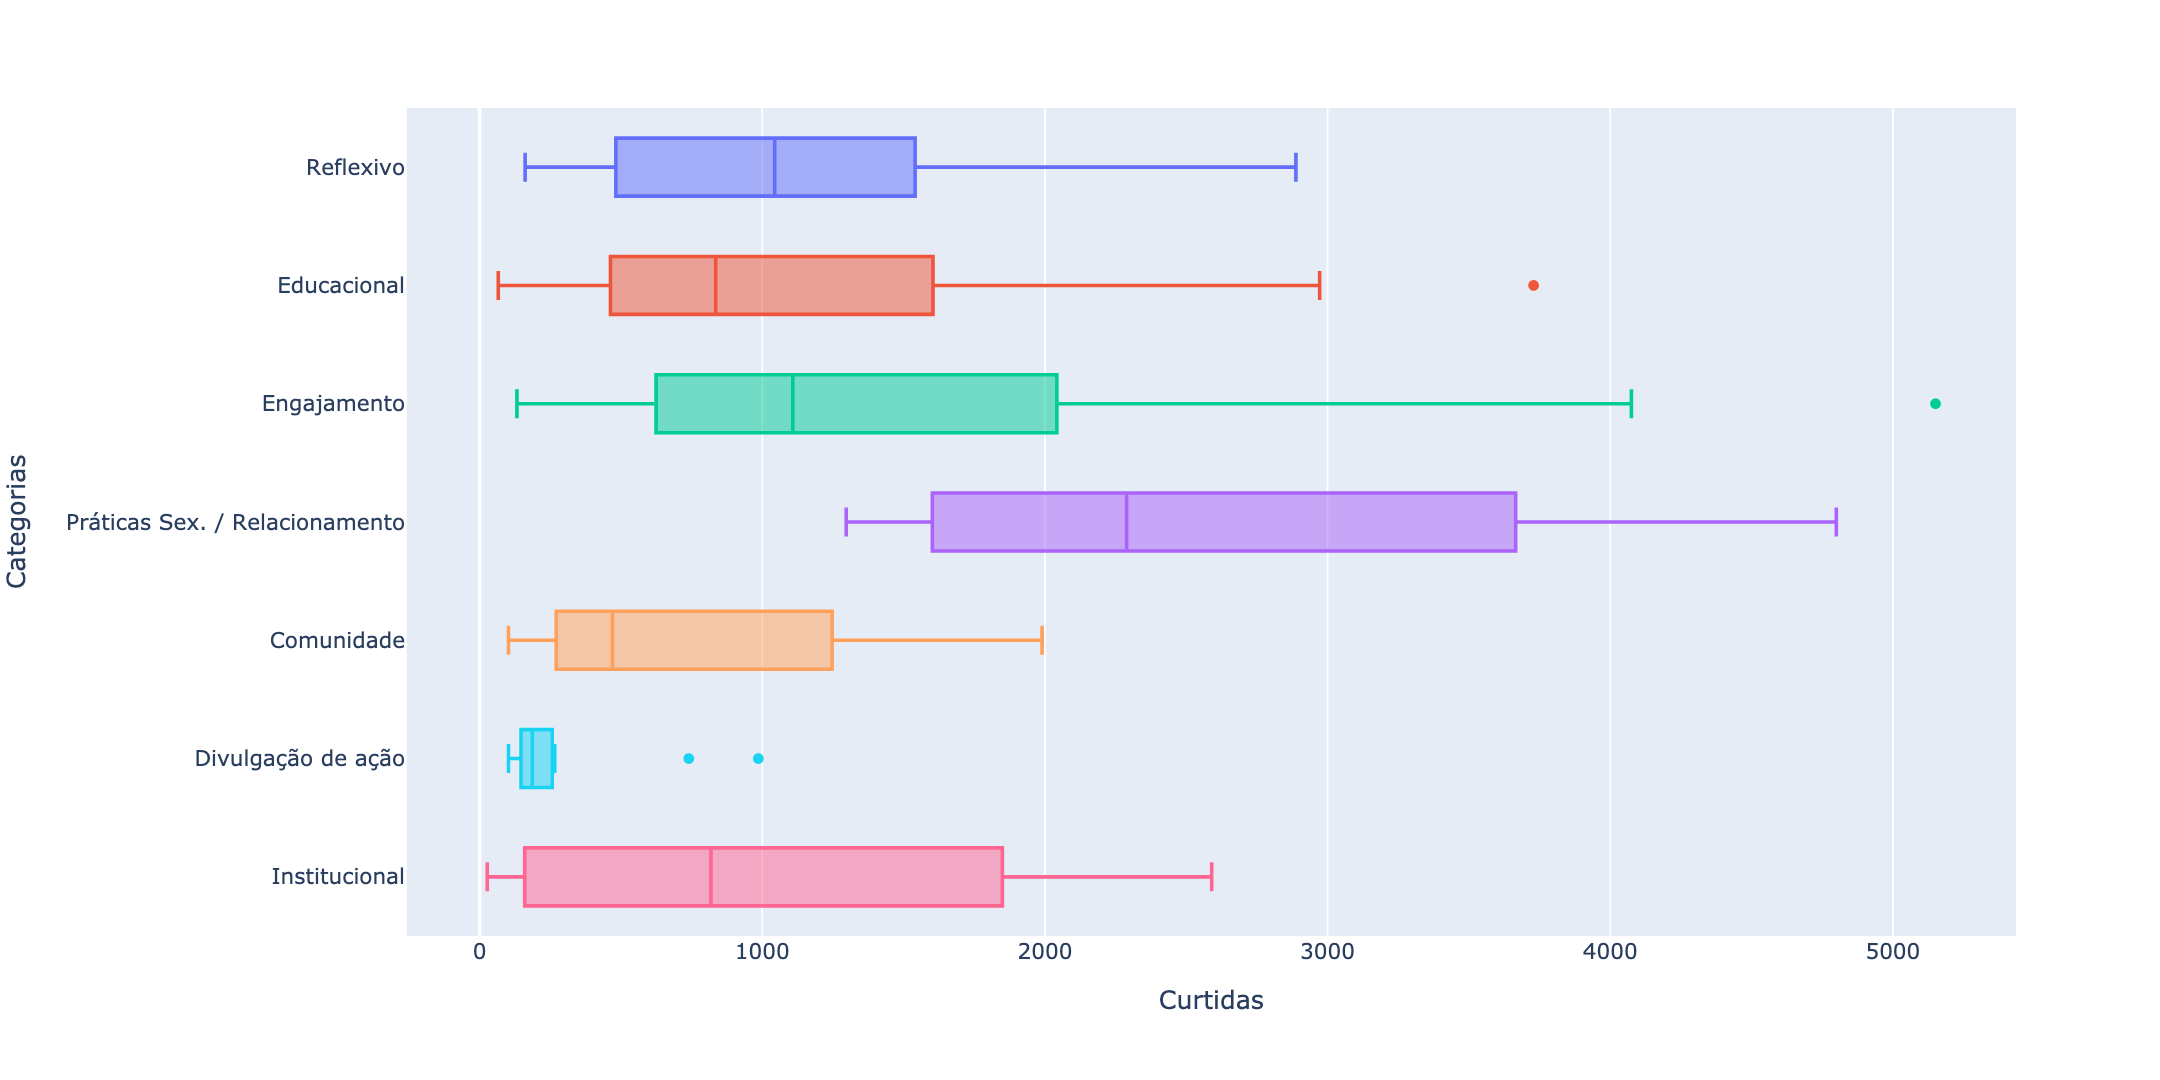

In [17]:
fig.show('png', scale=1.8)

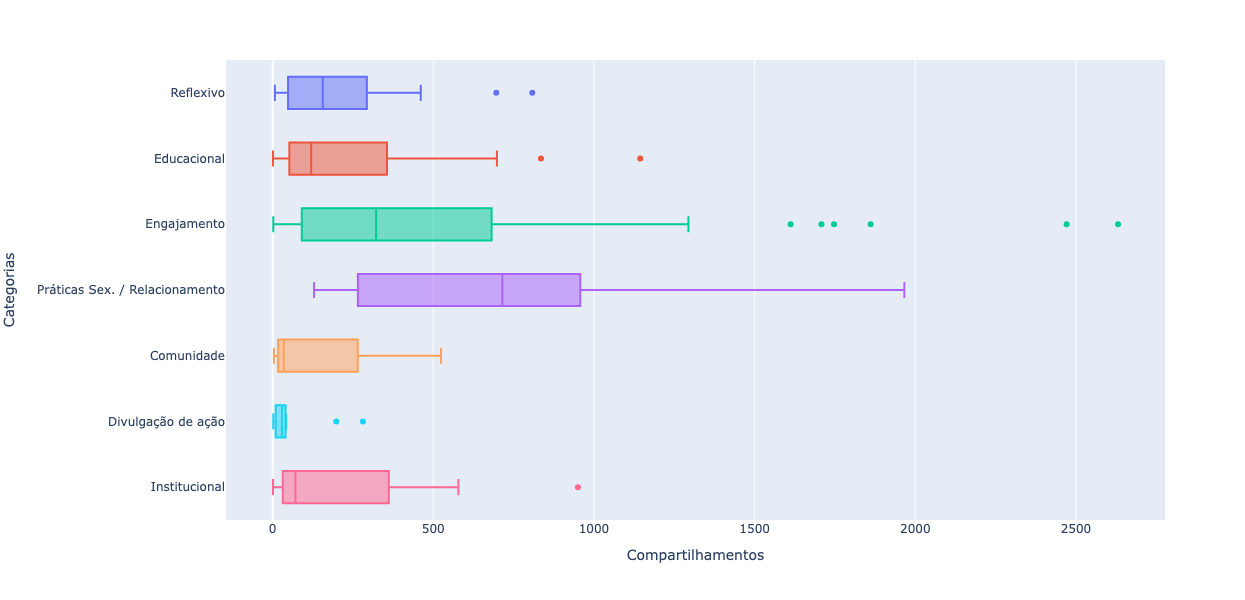

In [18]:
fig =px.box(df, x='Compartilhamentos', y='Categorias', color='Categorias')

fig.update_layout(
    width=1200,
    height=600,
    showlegend=False
)

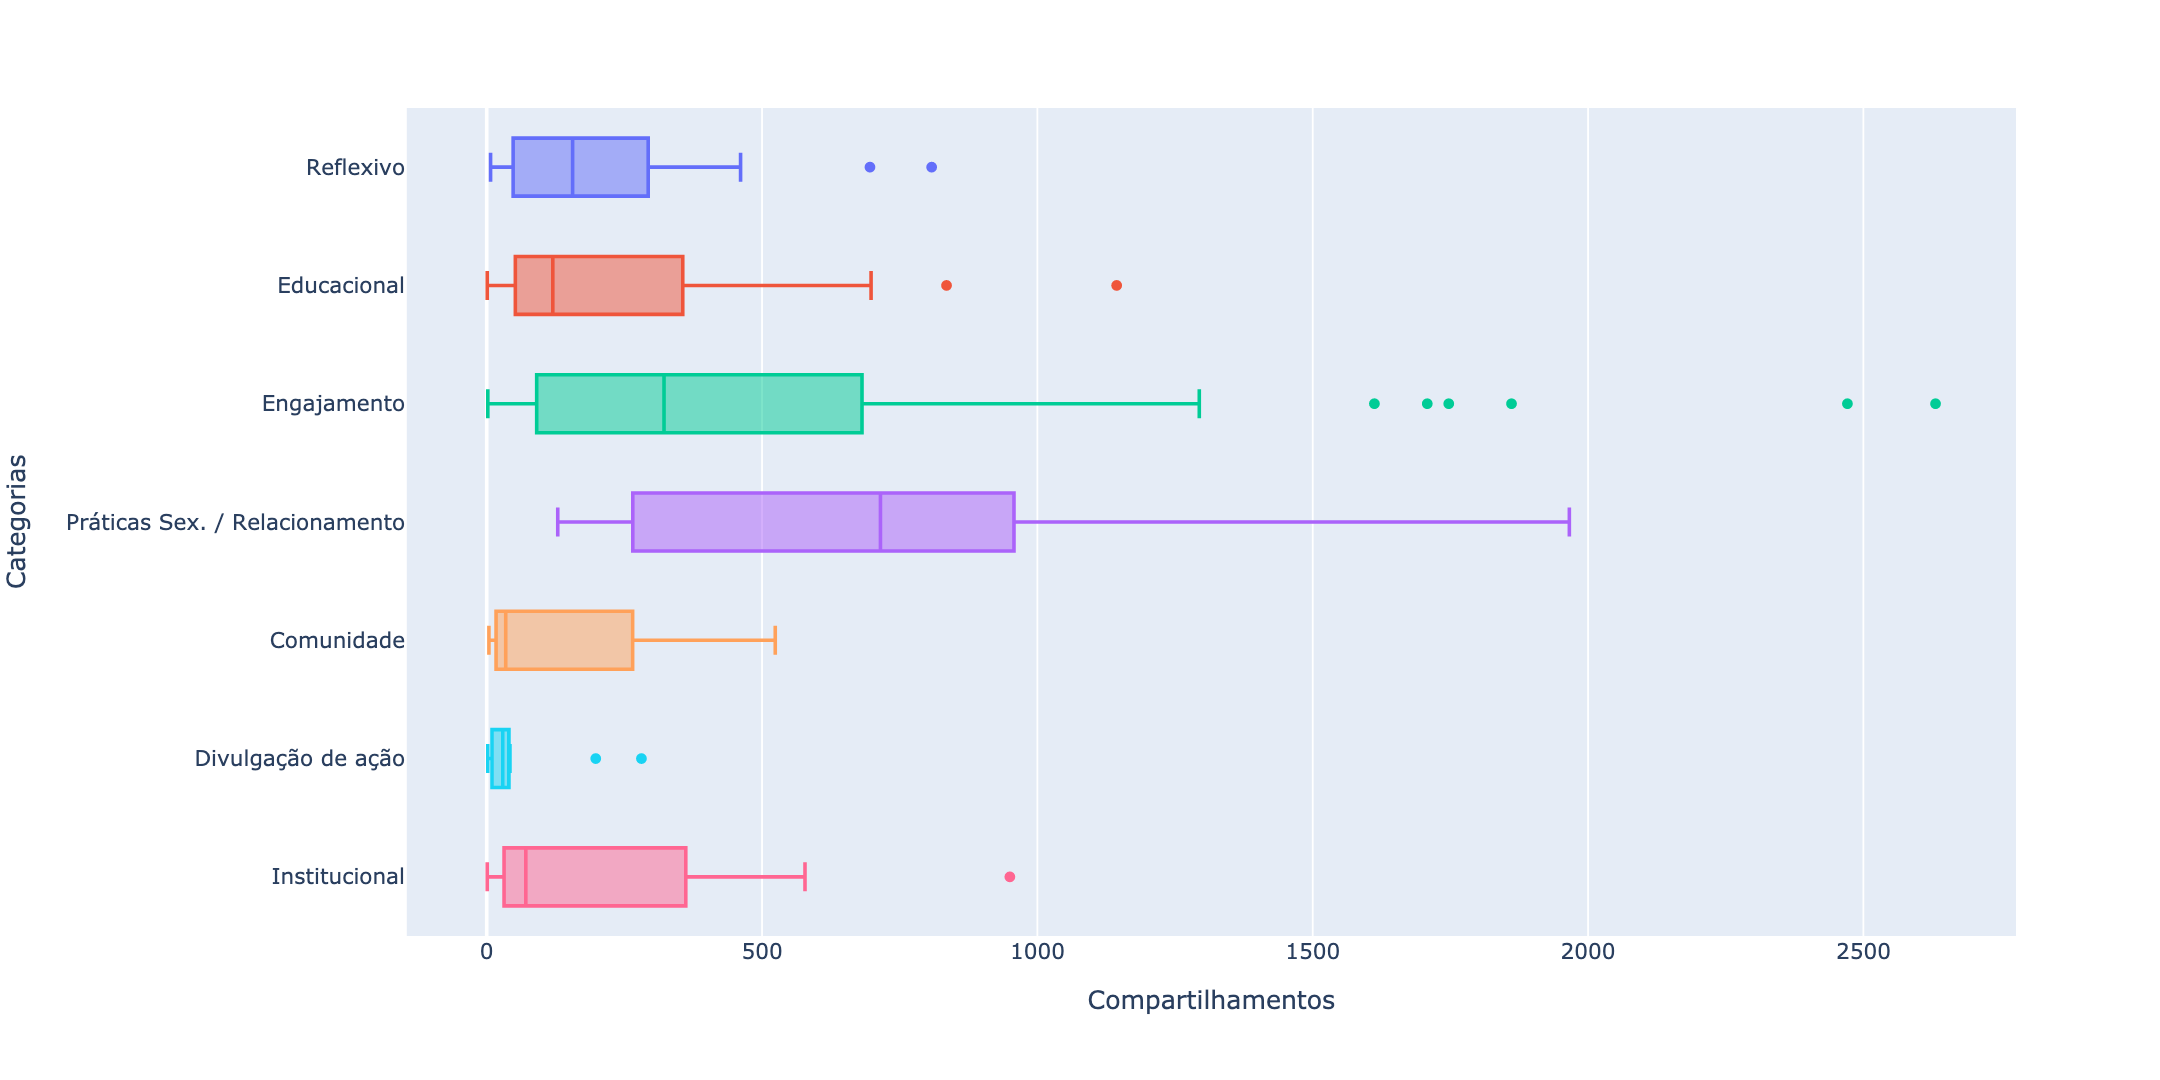

In [19]:
fig.show('png', scale=1.8)

# Gráfico barra e Boxplot de Funil por alcance médio

In [20]:
df_aux = df[['Alcance', 'Funil']].groupby('Funil').agg({'Alcance':['mean', 'std']}).round()

df_aux.columns = ['Alcance médio', 'Desvio padrão']

df_aux = df_aux.reset_index()

df_aux.sort_values(['Alcance médio','Desvio padrão' ], ascending=False, inplace=True)

df_aux 

Funil  Alcance médio  Desvio padrão
2   Topo        21276.0        13550.0
1   Meio        17236.0         9667.0
0  Fundo        13248.0        10722.0

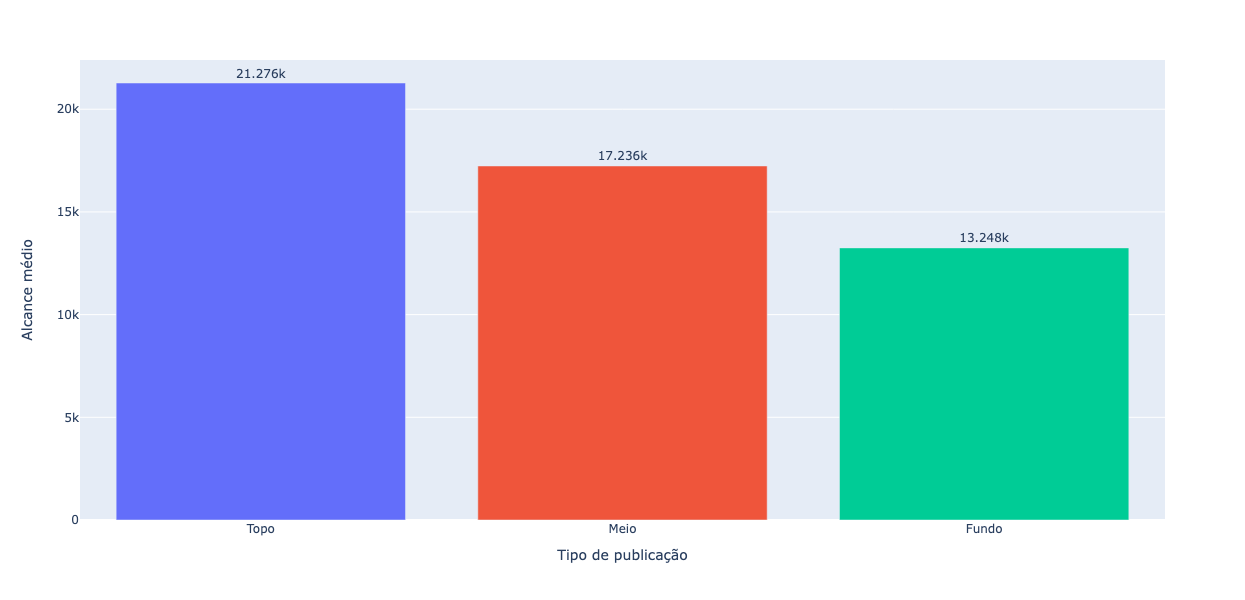

In [21]:
fig = px.bar( df_aux,  x='Funil', y='Alcance médio', color= 'Funil')

fig.update_layout(
    width=1200,
    height=600,
    yaxis_title='Alcance médio',
    xaxis_title='Tipo de publicação',
    showlegend=False,
  
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

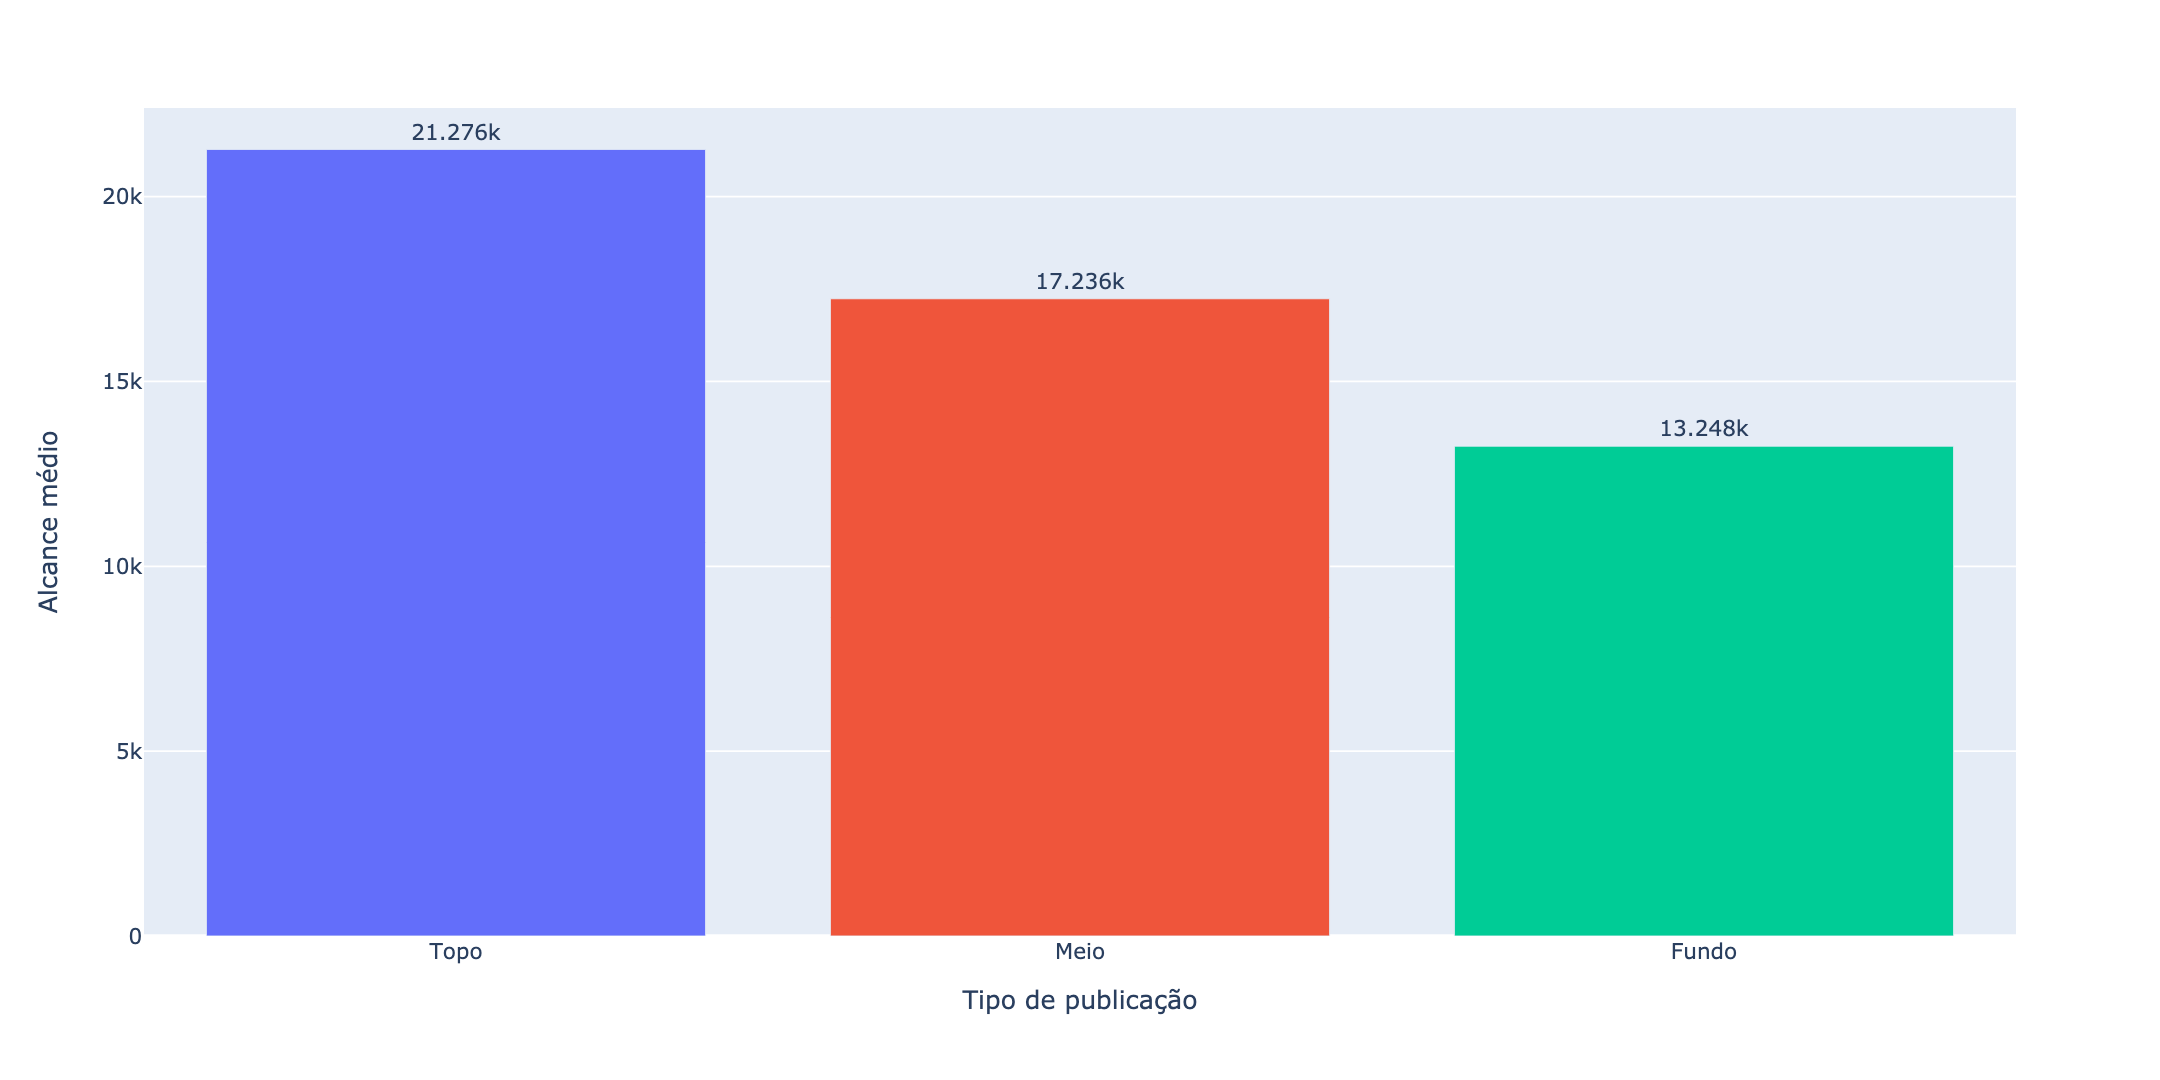

In [22]:
fig.show('png', scale=1.8)

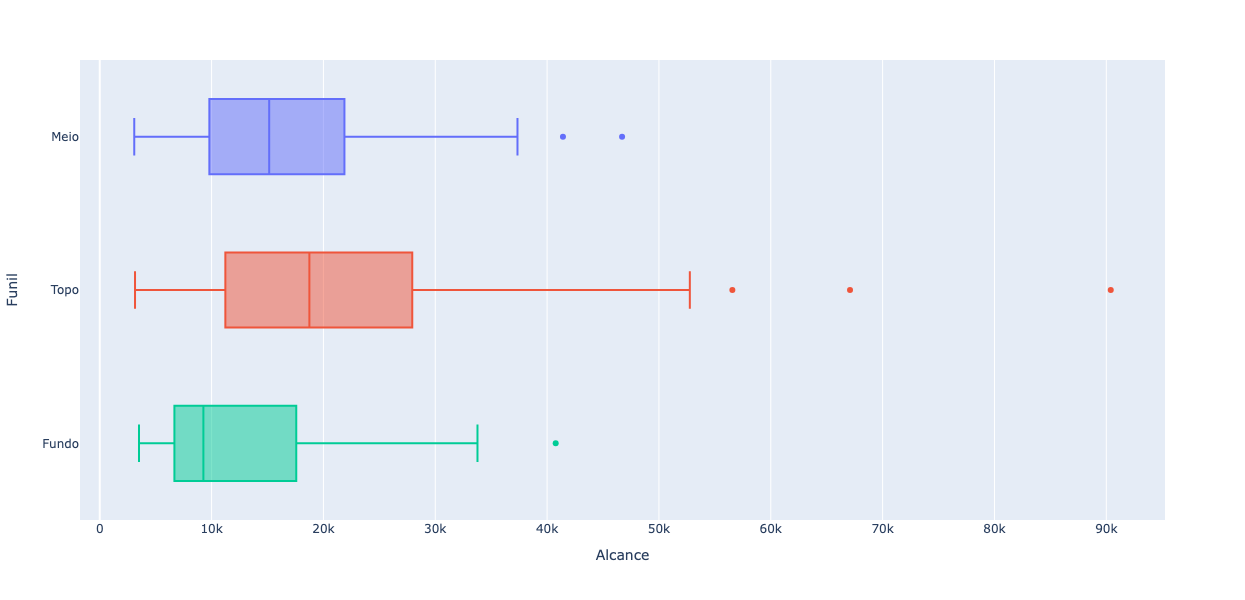

In [15]:
fig = px.box( df, x='Alcance', y='Funil', color='Funil')

fig.update_layout(
    width=1200,
    height=600,
    showlegend=False
)

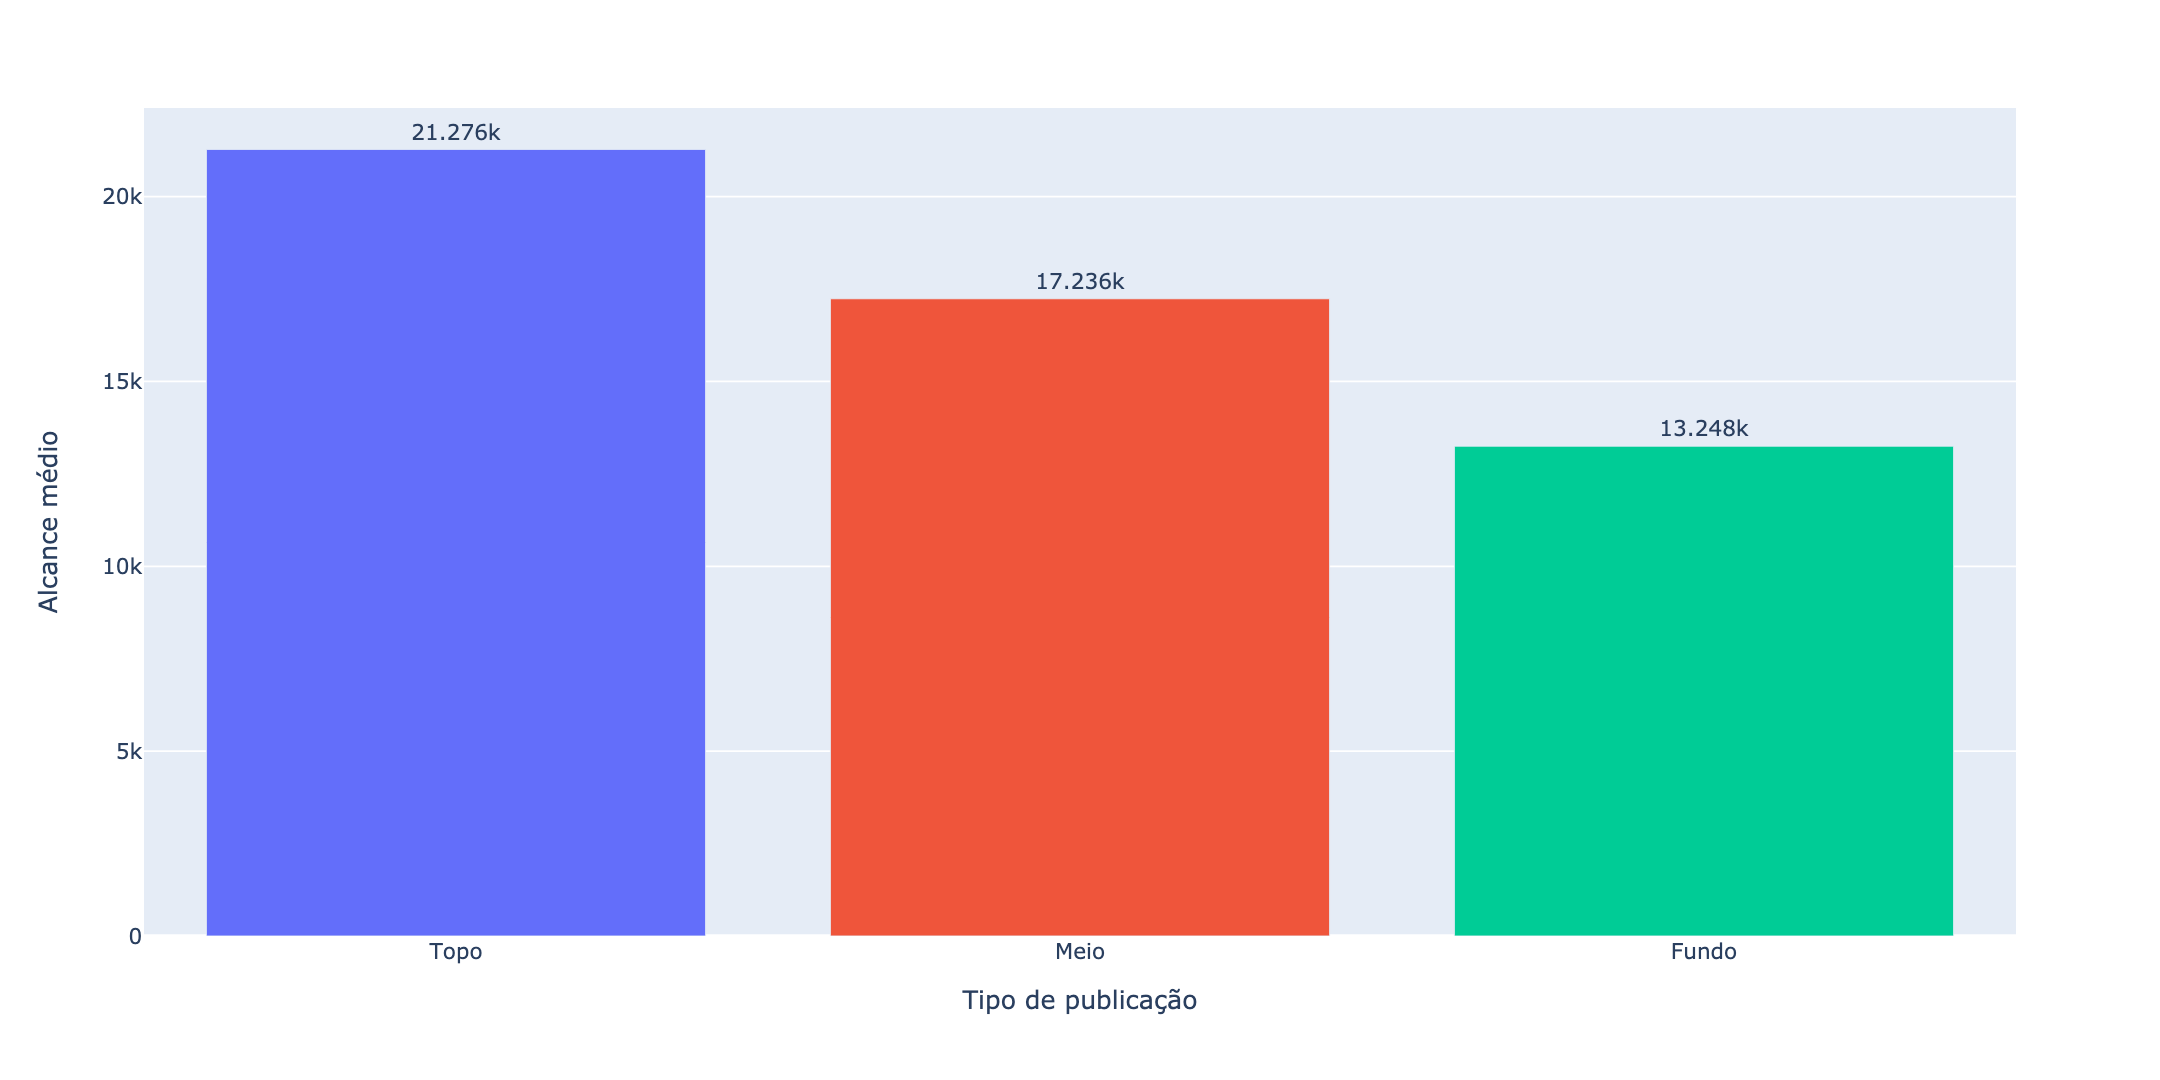

In [23]:
fig.show('png', scale=1.8)

# Qual foram os 20 melhores posts por categorias?

In [24]:
df_aux = df.sort_values('Alcance', ascending=False).head(20)

df_aux['Categorias'].value_counts()

Engajamento                       11
Práticas Sex. / Relacionamento     4
Educacional                        3
Reflexivo                          1
Institucional                      1
Name: Categorias, dtype: int64

In [25]:
df_aux = df.sort_values('Curtidas', ascending=False).head(20)

df_aux['Categorias'].value_counts()

Engajamento                       10
Práticas Sex. / Relacionamento     4
Educacional                        4
Reflexivo                          2
Name: Categorias, dtype: int64

In [26]:
df_aux = df.sort_values('Compartilhamentos', ascending=False).head(20)

df_aux['Categorias'].value_counts()

Engajamento                       17
Práticas Sex. / Relacionamento     2
Educacional                        1
Name: Categorias, dtype: int64

# Análise de posts com Produto

In [27]:
df_filtered = df.copy()[(df['Produto'] == 'Com produto')  | (df['Produto'] == 'Com produto na legenda')]

# Ordenar os valores pela coluna 'Alcance médio'
df_filtered.sort_values('Alcance', ascending=False, inplace=True)

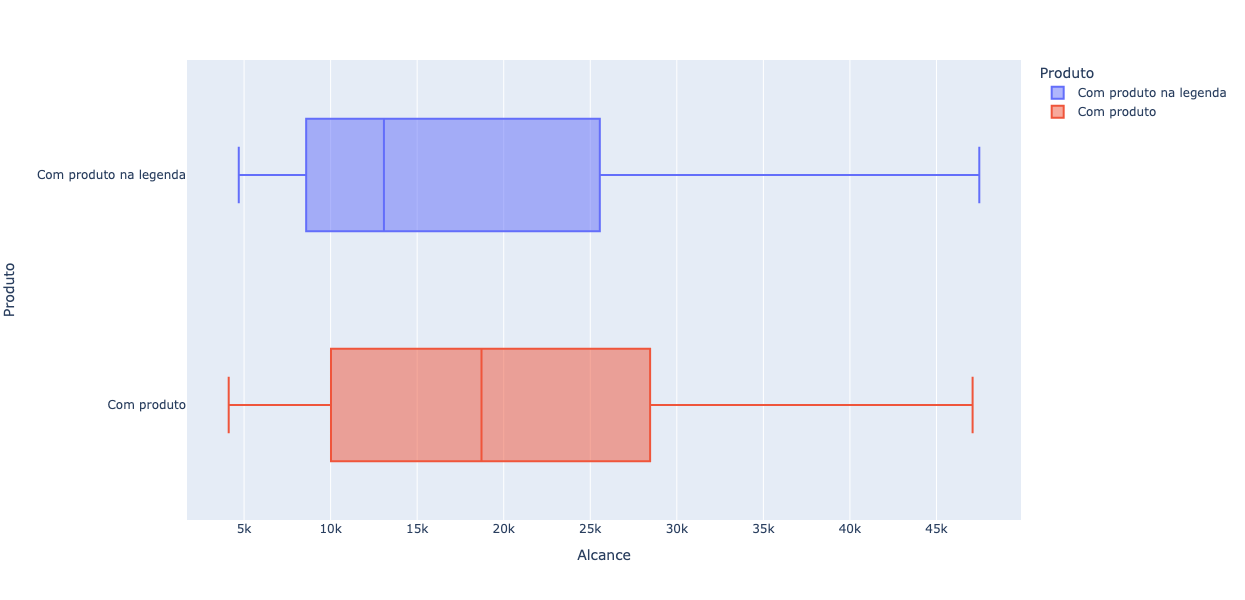

In [28]:
fig = px.box(df_filtered, x='Alcance', y='Produto', color='Produto')


fig.update_layout(
    width=1200,
    height=600,
)

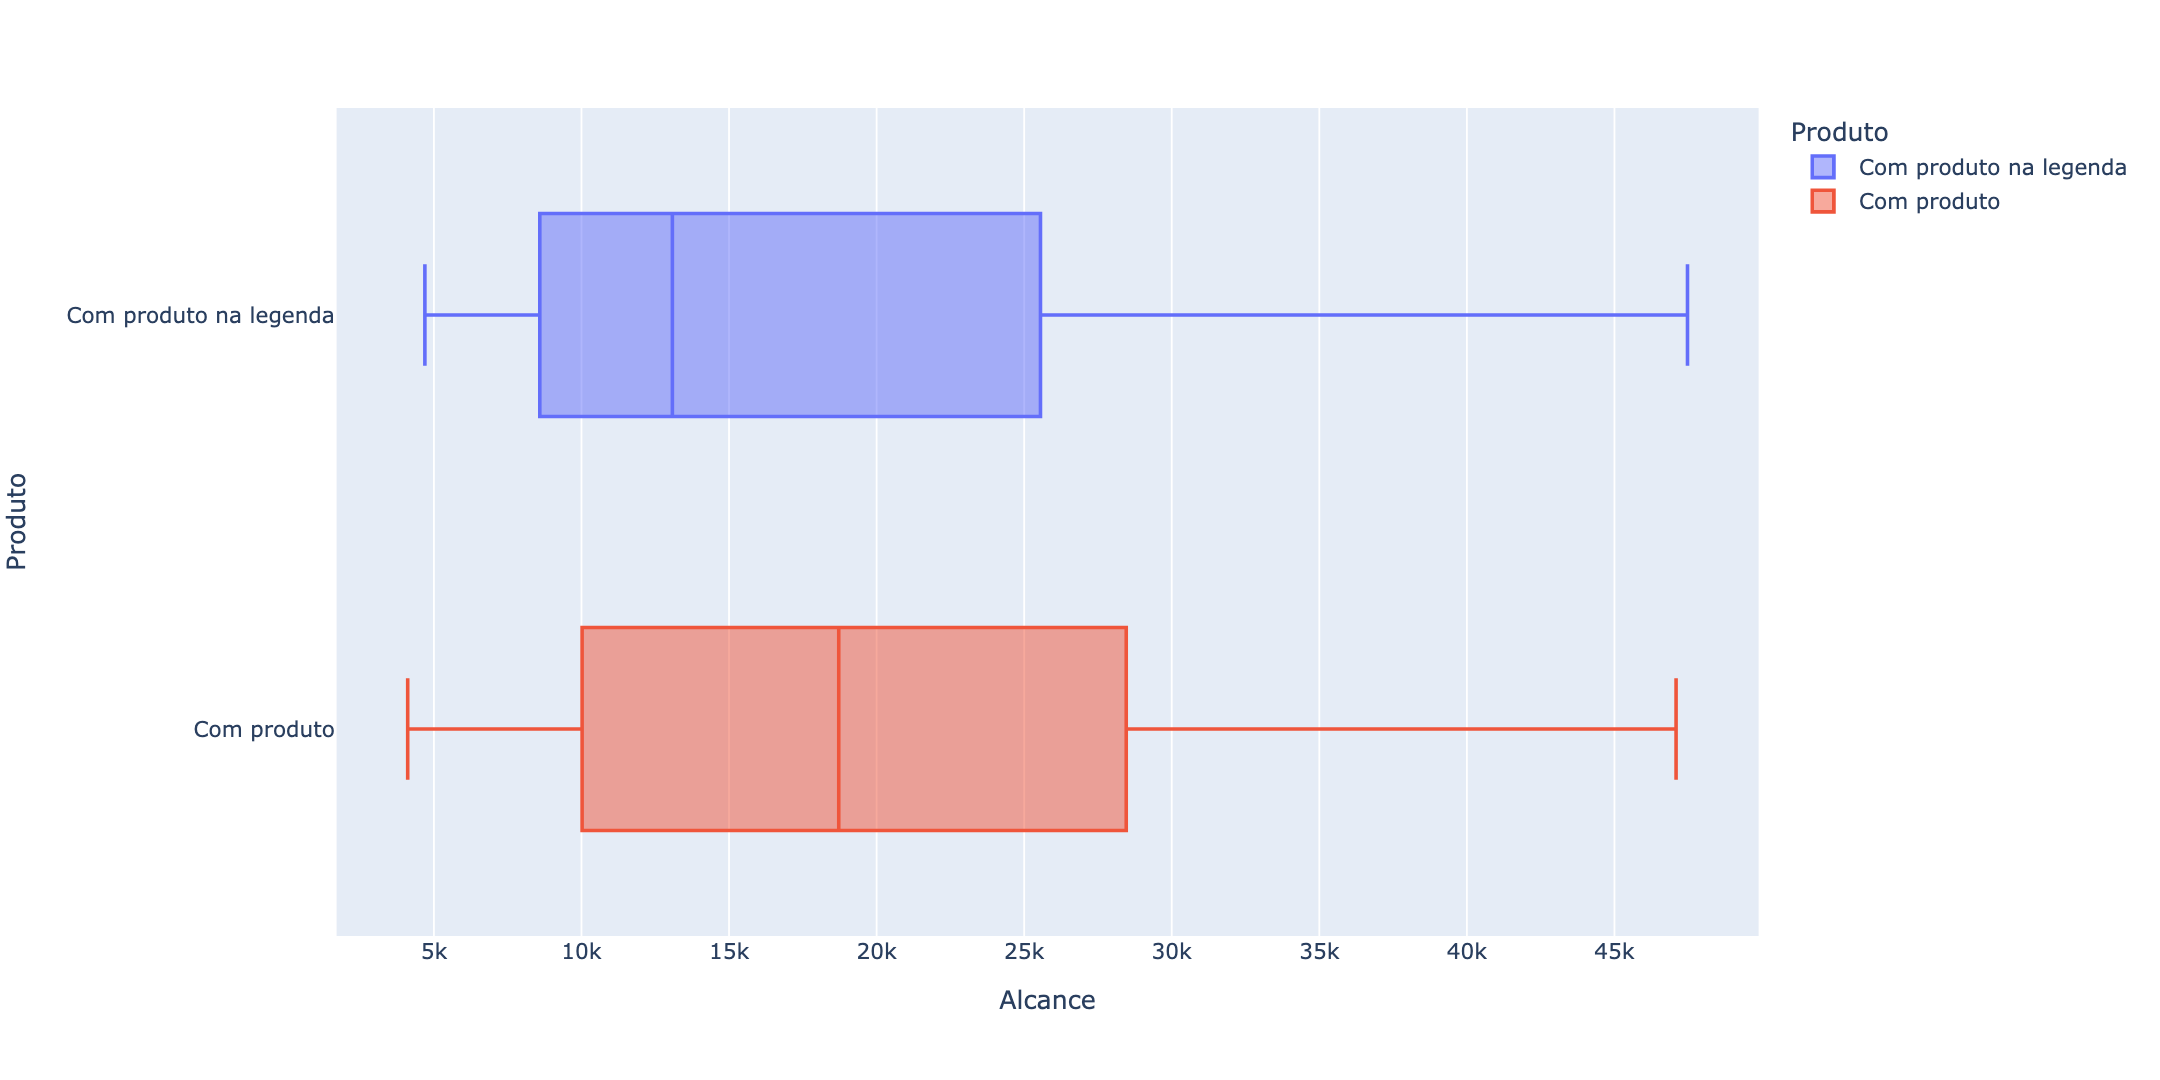

In [29]:
fig.show('png', scale=1.8)

# Média de todas as métricas por categorias e por funil

In [30]:
df_aux = df[['Alcance', 'Curtidas', 'Compartilhamentos','Salvamentos','Categorias']].groupby('Categorias').agg({
    'Alcance': 'mean',
    'Curtidas': 'mean',
    'Compartilhamentos': 'mean',
    'Salvamentos' : 'mean',
    
}).round()

df_aux.columns = ['Media_Alcance', 'Media_Curtidas', 'Media_Compartilhamentos', 'Media_Salvamentos']

df_aux = df_aux.reset_index()

df_aux.sort_values('Media_Alcance', ascending=False)

Categorias  Media_Alcance  Media_Curtidas  \
5  Práticas Sex. / Relacionamento        37182.0          2769.0   
3                     Engajamento        21138.0          1421.0   
2                     Educacional        18521.0          1150.0   
4                   Institucional        17782.0          1034.0   
6                       Reflexivo        16847.0          1123.0   
0                      Comunidade        15116.0           772.0   
1              Divulgação de ação         6825.0           301.0   

   Media_Compartilhamentos  Media_Salvamentos  
5                    761.0             1044.0  
3                    489.0              173.0  
2                    236.0              220.0  
4                    235.0              193.0  
6                    196.0              168.0  
0                    127.0               73.0  
1                     60.0               21.0

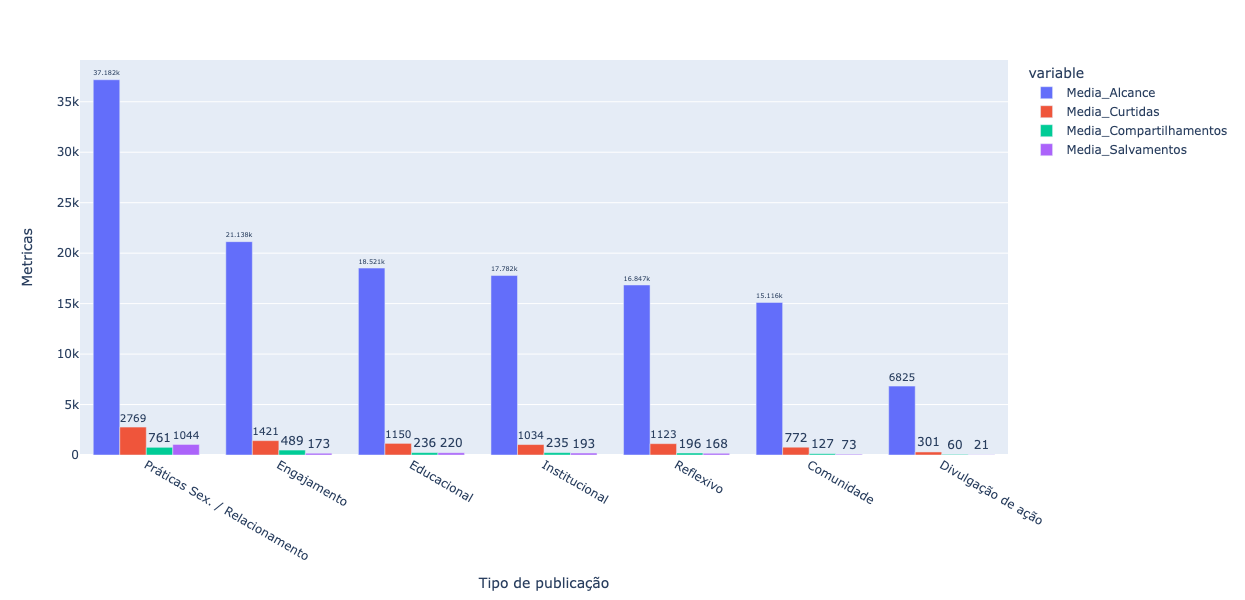

In [31]:
fig = px.bar( df_aux.sort_values('Media_Alcance', ascending=False),  x='Categorias', 
             y=['Media_Alcance', 'Media_Curtidas', 'Media_Compartilhamentos', 'Media_Salvamentos'] )

fig.update_layout(
    width=1200,
    height=600,
    yaxis_title='Metricas',
    xaxis_title='Tipo de publicação',
    barmode='group'
  
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

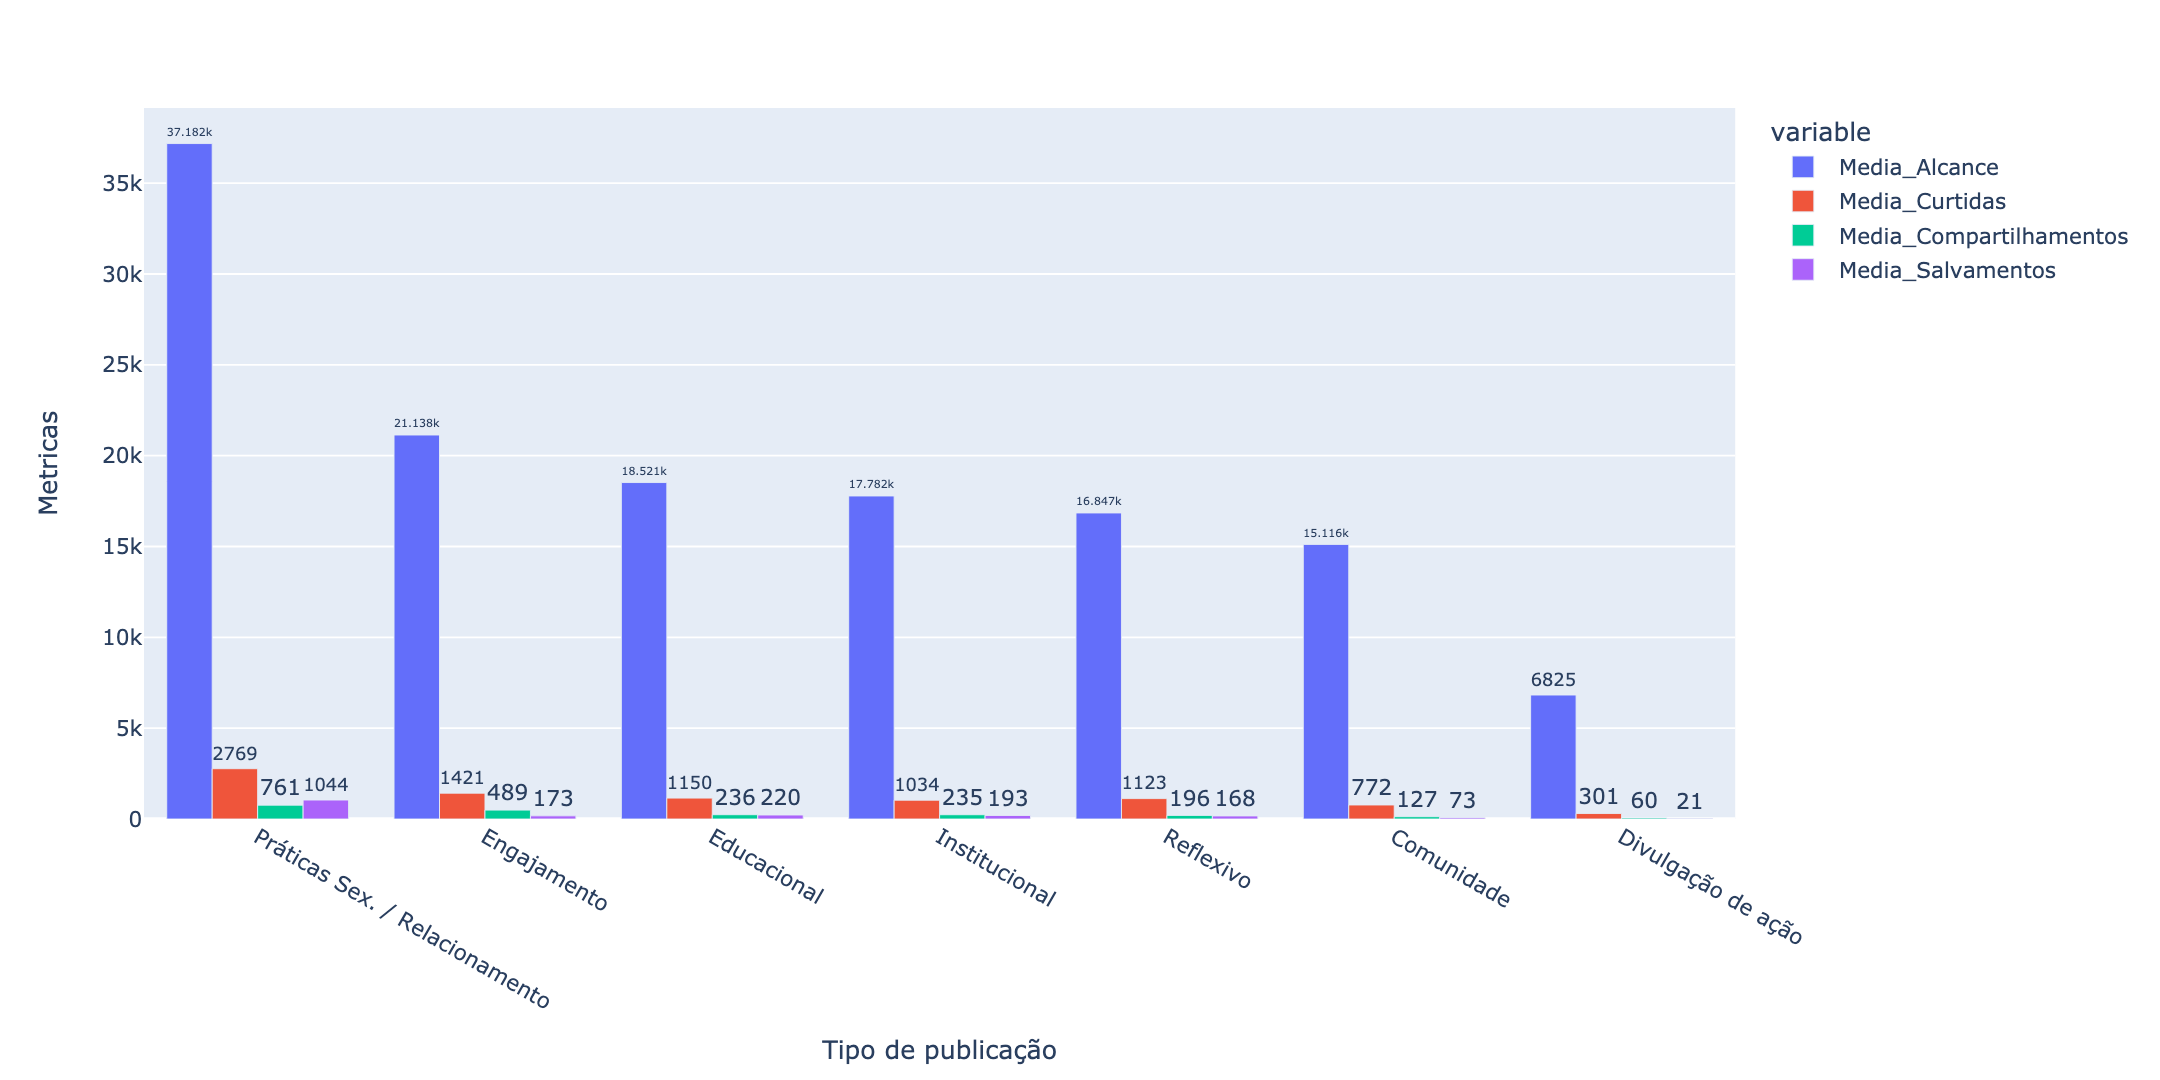

In [32]:
fig.show('png', scale=1.8)

In [35]:
df_aux = df[['Alcance', 'Curtidas', 'Compartilhamentos','Salvamentos','Funil']].groupby('Funil').agg({
    'Alcance': 'mean',
    'Curtidas': 'mean',
    'Compartilhamentos': 'mean',
    'Salvamentos' : 'mean',
    
}).round()

df_aux.columns = ['Media_Alcance', 'Media_Curtidas', 'Media_Compartilhamentos', 'Media_Salvamentos']

df_aux = df_aux.reset_index()

df_aux.sort_values('Media_Alcance', ascending=False)

Funil  Media_Alcance  Media_Curtidas  Media_Compartilhamentos  \
2   Topo        21276.0          1408.0                    454.0   
1   Meio        17236.0          1116.0                    205.0   
0  Fundo        13248.0           704.0                    180.0   

   Media_Salvamentos  
2              208.0  
1              198.0  
0              119.0

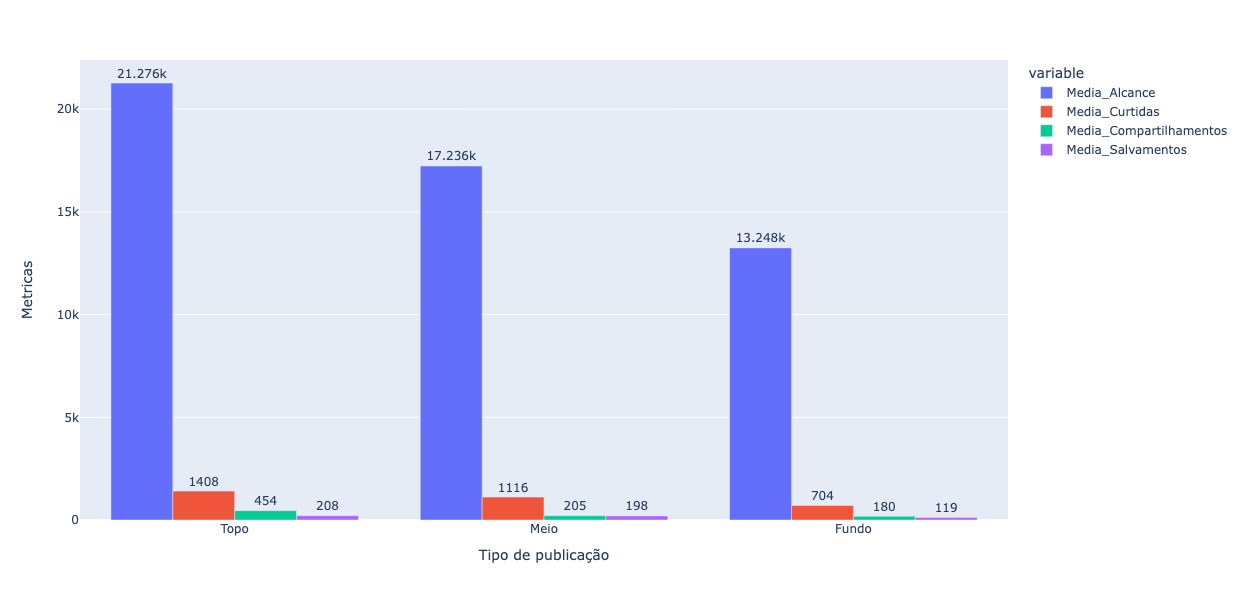

In [36]:
fig = px.bar( df_aux.sort_values('Media_Alcance', ascending=False),  x='Funil', 
             y=['Media_Alcance', 'Media_Curtidas', 'Media_Compartilhamentos', 'Media_Salvamentos'] )

fig.update_layout(
    width=1200,
    height=600,
    yaxis_title='Metricas',
    xaxis_title='Tipo de publicação',
    barmode='group'
  
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

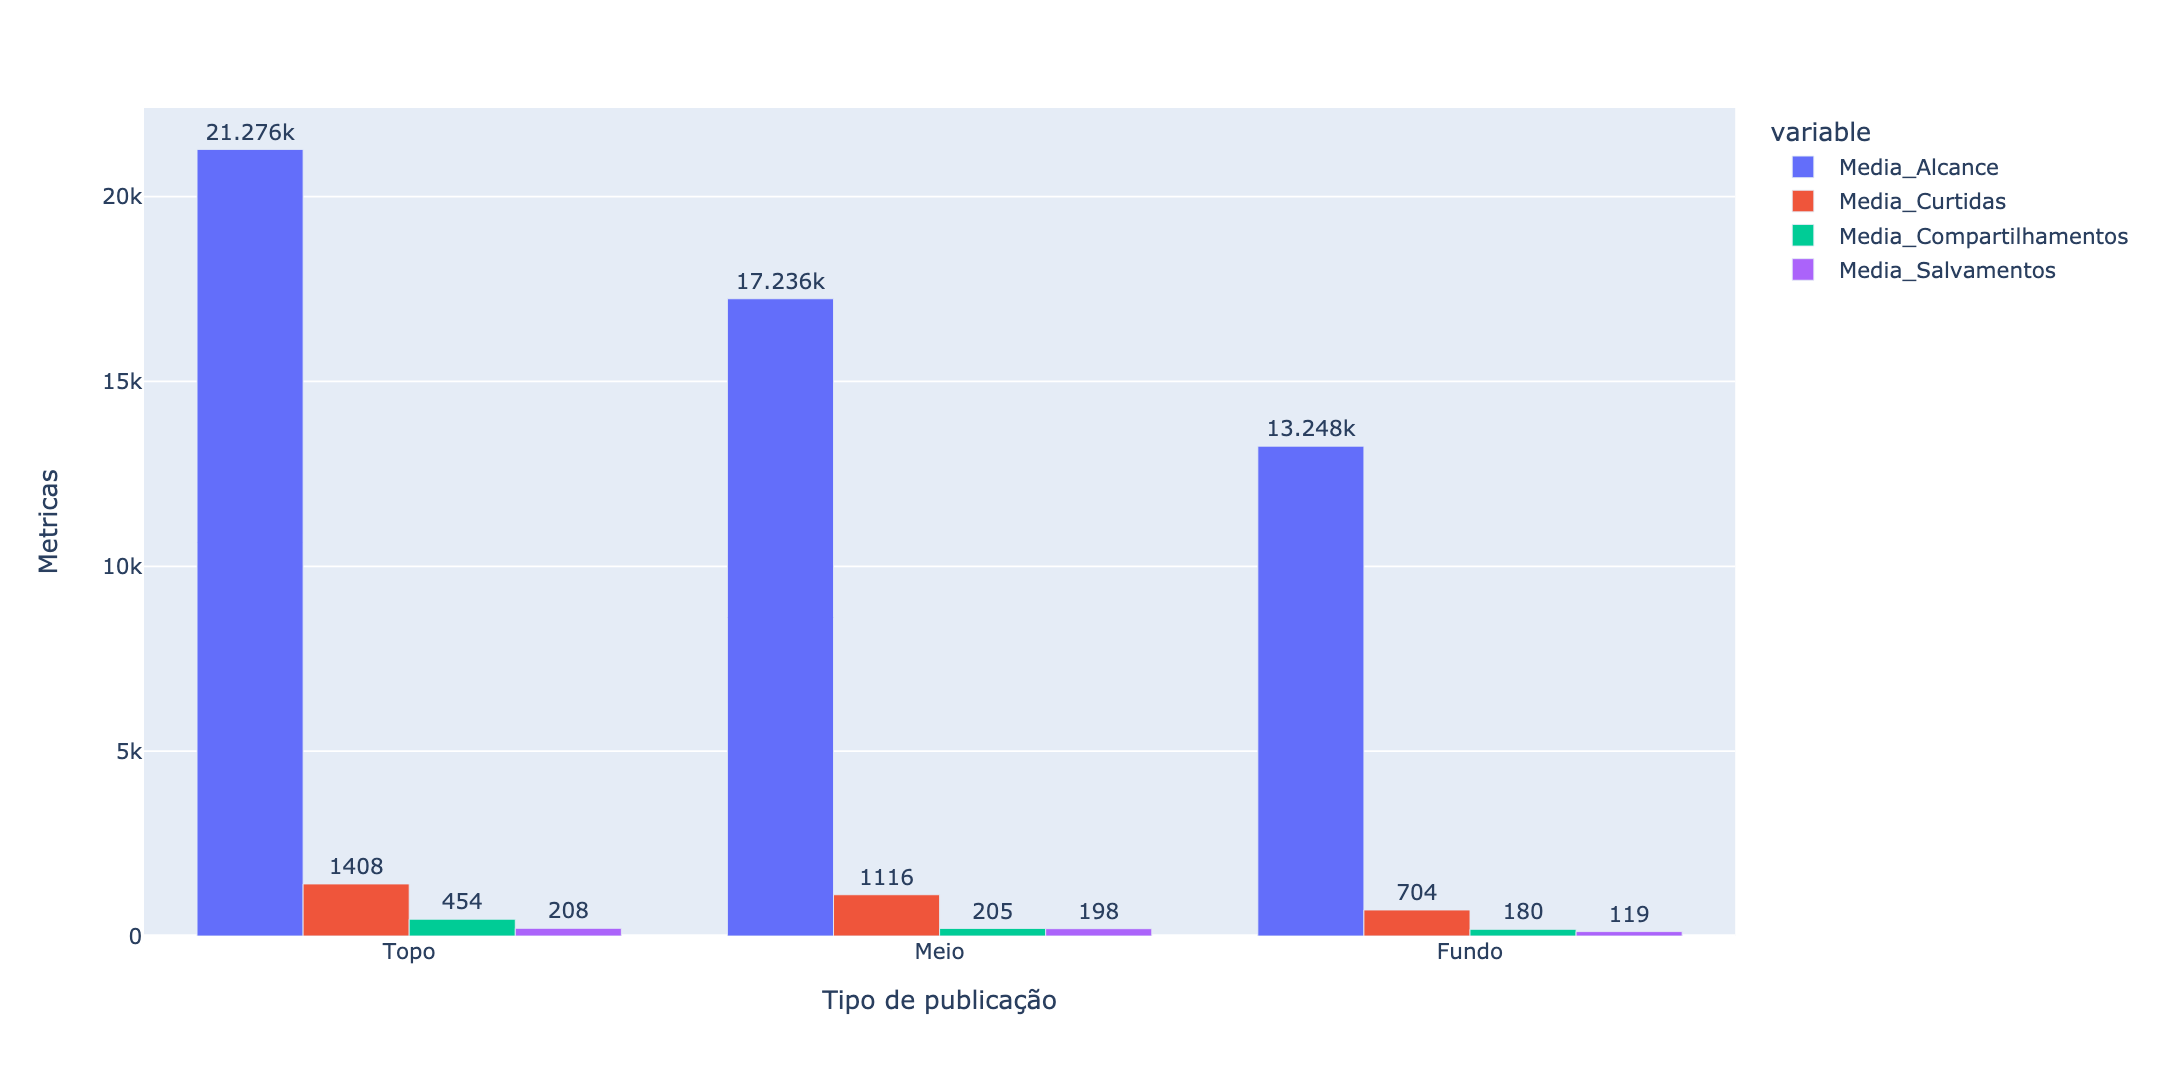

In [37]:
fig.show('png', scale=1.8)